In [1]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import numpy as np
import random
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# table of differential features
diff=pd.read_table("./data/dblr_dsfdr.txt", sep='\t', dtype=str, index_col=0)
diff.head(1)

,10422.32.F.8,10422.26.F.13,10422.22.F.9,10422.23.F.3,10422.19.F.5,10422.25.F.4,10422.27.F.8,10422.26.F.6,10422.26.F.5,10422.28.F.6,...,10422.26.F.11,10422.28.F.4,10422.27.F.11,10422.17.F.6,10422.32.F.10,10422.31.F.4,10422.23.F.2,10422.31.F.2,pvalue,test_statistic
TACGTAGGTGGCAAGCGTTATCCGGAATTATTGGGCGTAAAGAGGGAGCAGGCGGCAGCAAAGGTCTGTGGTGAAAGACTGAAGCTTAACTTCAGTAAGCCATAGAAACCGGGCAGCTAGAGTGCAGGAGAGGATCGTGGAATTCCATGT,1.0,14.0,115.0,54.0,43.0,78.0,4.0,53.0,32.0,14.0,...,22.0,88.0,2.0,146.0,3.0,62.0,0.0,0.0,9.999000099991662e-05,46.64299516908213


In [3]:
#feature table with taxonomy
table=pd.read_table("./data/haddad_6weeks_deblur_otus_rare2k_matched_wtaxa.txt", sep='\t', dtype=str, index_col="#OTU ID")
table.head(1)

,10422.17.F.10,10422.17.F.11,10422.17.F.12,10422.17.F.13,10422.17.F.3,10422.17.F.4,10422.17.F.5,10422.17.F.6,10422.17.F.7,10422.17.F.8,...,10422.32.F.11,10422.32.F.12,10422.32.F.3,10422.32.F.4,10422.32.F.5,10422.32.F.6,10422.32.F.7,10422.32.F.8,10422.32.F.9,taxonomy
#OTU ID,,,,,,,,,,,,,,,,,,,,,
TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGACTGTCAAGTCAGCGGTAAAATTGAGAGGCTCAACCTCTTCCCGCCGTTGAAACTGGTGGTCTTGAGTGGATGAGAAGTACGCGGAATGCGTGGT,856.0,725.0,711.0,562.0,529.0,555.0,903.0,784.0,945.0,904.0,...,738.0,708.0,1104.0,773.0,673.0,615.0,1002.0,851.0,600.0,k__Bacteria; p__Bacteroidetes; c__Bacteroidia;...


In [4]:
#retaining only differential features in feature table
table=table.loc[diff.index]
table.shape

(87, 183)

In [5]:
# assigining unique taxonomy index 

f_pval = {}
f_tstar={}
pvals = []
teststat=[]
count = 0
for fid in table.index:
    pvals.append(diff.loc[fid, 'pvalue'])
    teststat.append(diff.loc[fid, 'test_statistic'])
    fname=table.loc[fid, 'taxonomy'] + str(count)
    table.loc[fid,"taxa_index"] = fname
    table.loc[fid,'pvalue']=diff.loc[fid, 'pvalue']
    table.loc[fid,'test_statistic']=diff.loc[fid, 'test_statistic']
    f_pval[fname] = diff.loc[fid, 'pvalue']
    f_pval[fname] = diff.loc[fid, 'test_statistic']
    
    
    count+=1

table=table.sort_values(by='test_statistic', axis=0, ascending=True)

In [6]:
len(table.taxa_index.unique())

87

In [8]:
table.to_csv("./data/differential_microbes.txt", sep = '\t')

In [27]:
table=table.drop(['taxonomy', 'pvalue'], axis=1)

In [29]:
#metadata file
md = pd.read_table('./data/haddad_6weeks_metadata_matched.txt', sep='\t', dtype=str, index_col='#SampleID')
md.shape

(182, 69)

### plotting trends

In [38]:
datap=table.set_index('taxa_index').T

In [39]:
datap.loc['test_statistic']=pd.to_numeric(datap.loc['test_statistic'])
datap=datap.sort_values(by='test_statistic', axis=1, ascending=True)

In [40]:
datap = datap.drop(['test_statistic'], axis=0)

In [41]:
datap=datap.apply(pd.to_numeric)

for s1 in datap.index:
    for s2 in md.index:
        if s1==s2:
            datap.loc[s1, "exposure_type"] = md.loc[s2, "exposure_type"]
            datap.loc[s1, "age"]=md.loc[s2, "age"]
            
datap.sort_values(by='age', axis=0, inplace=True)

In [42]:
datap.head(2)

taxa_index,k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Clostridiaceae; g__; s__52,k__Bacteria; p__Actinobacteria; c__Coriobacteriia; o__Coriobacteriales; f__Coriobacteriaceae; g__; s__21,k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Clostridiaceae; g__; s__55,k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales63,k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Lachnospiraceae; g__; s__14,k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__S24-7; g__; s__83,k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Ruminococcaceae; g__Oscillospira; s__8,k__Bacteria; p__Firmicutes; c__Erysipelotrichi; o__Erysipelotrichales; f__Erysipelotrichaceae; g__Allobaculum; s__67,k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Lachnospiraceae; g__Coprococcus; s__73,k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales54,...,k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Lachnospiraceae9,k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Ruminococcaceae; g__Oscillospira; s__5,k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Ruminococcaceae; g__Anaerotruncus; s__10,k__Bacteria; p__Firmicutes; c__Erysipelotrichi; o__Erysipelotrichales; f__Erysipelotrichaceae; g__; s__0,k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__; g__; s__29,k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Ruminococcaceae; g__Oscillospira; s__20,k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Lachnospiraceae; g__; s__62,k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__[Mogibacteriaceae]; g__; s__25,exposure_type,age
10422.29.F.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Air,10
10422.22.F.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,IHH,10


/Users/priya/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


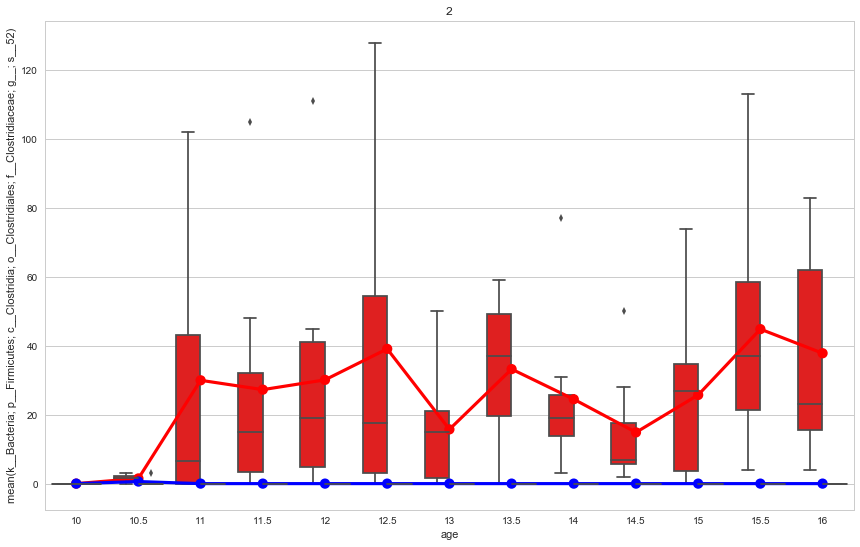

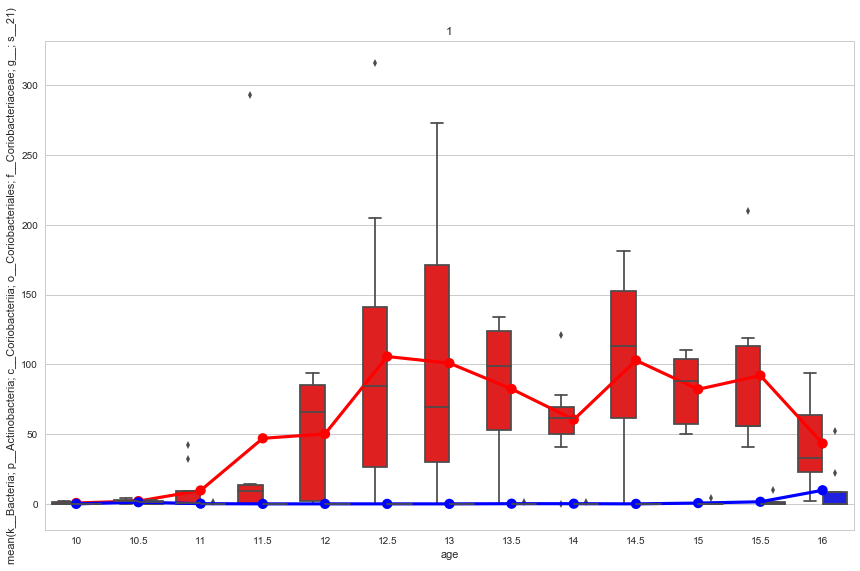

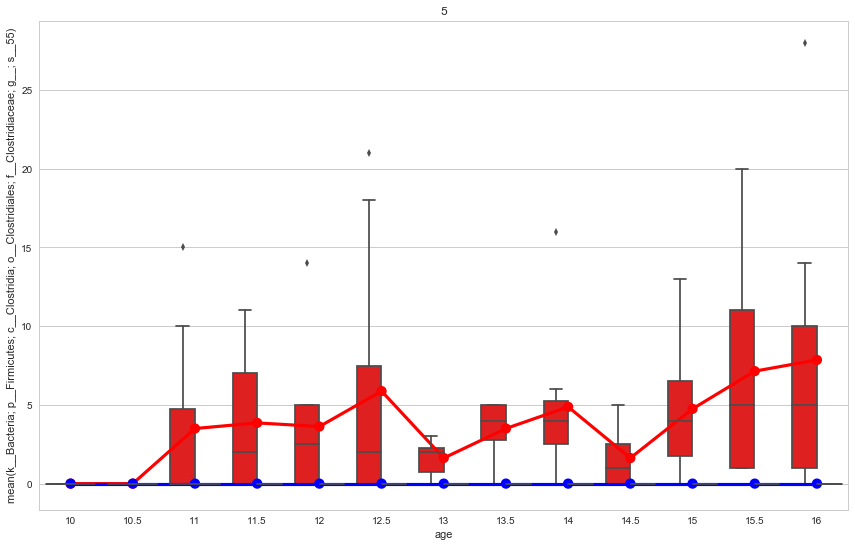

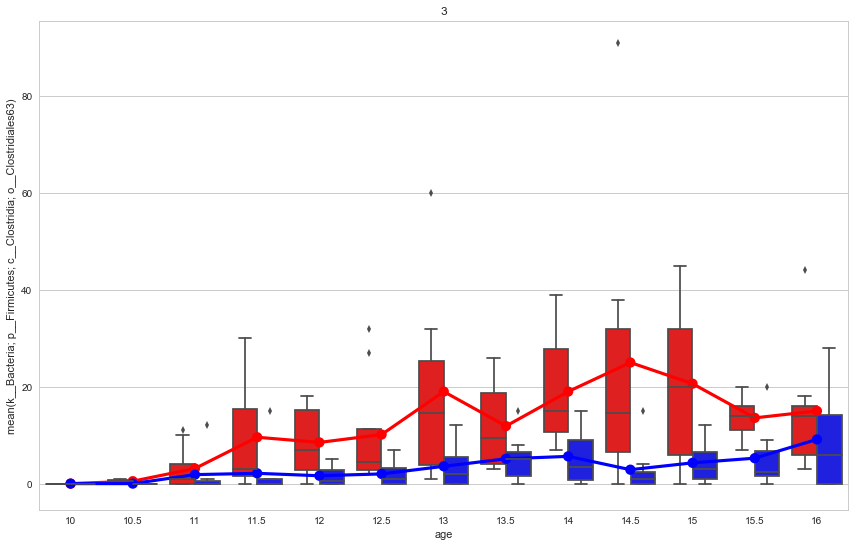

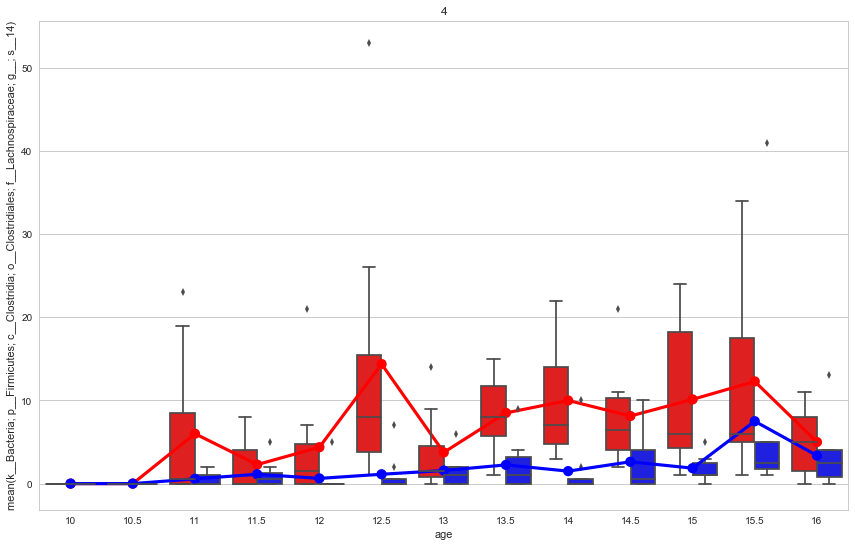

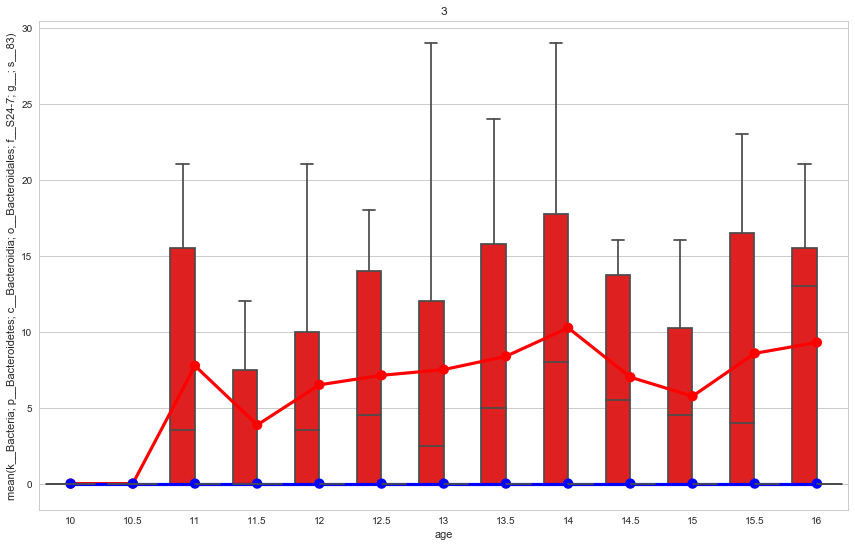

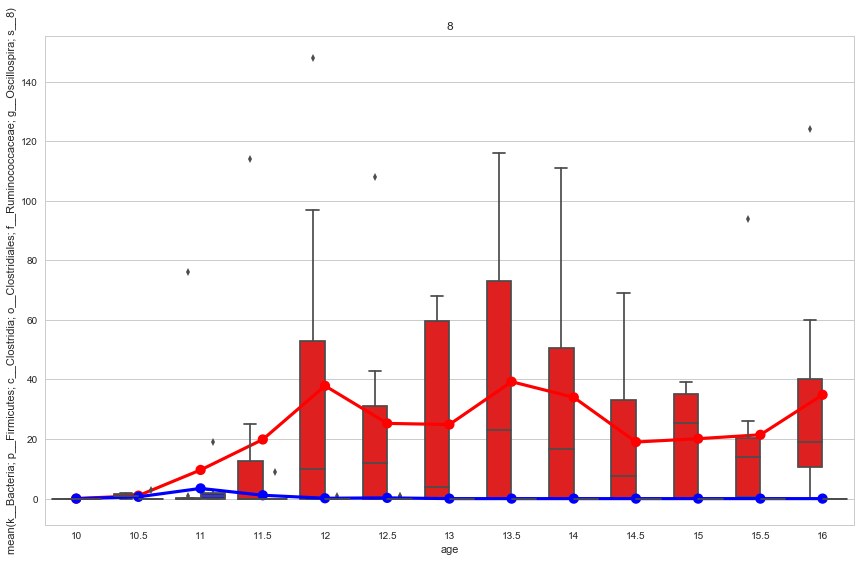

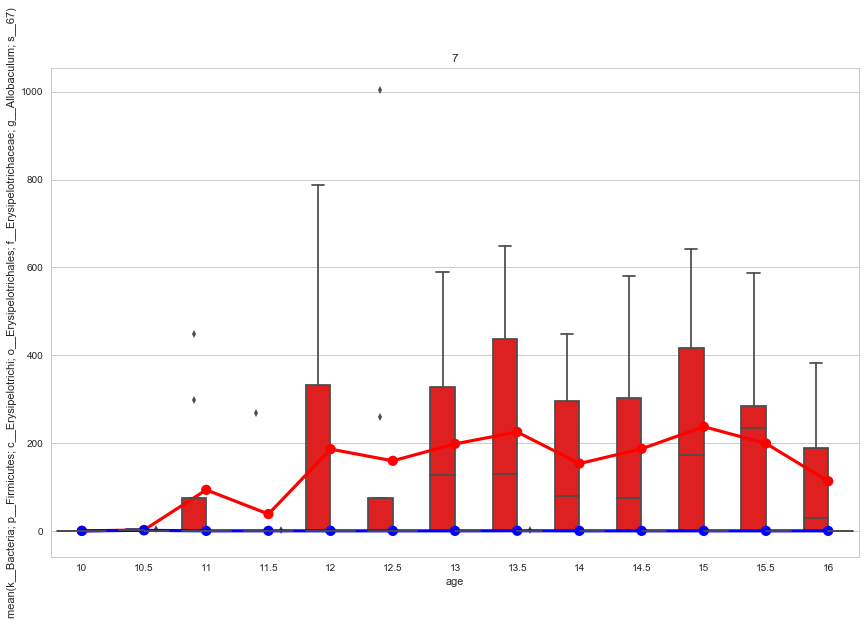

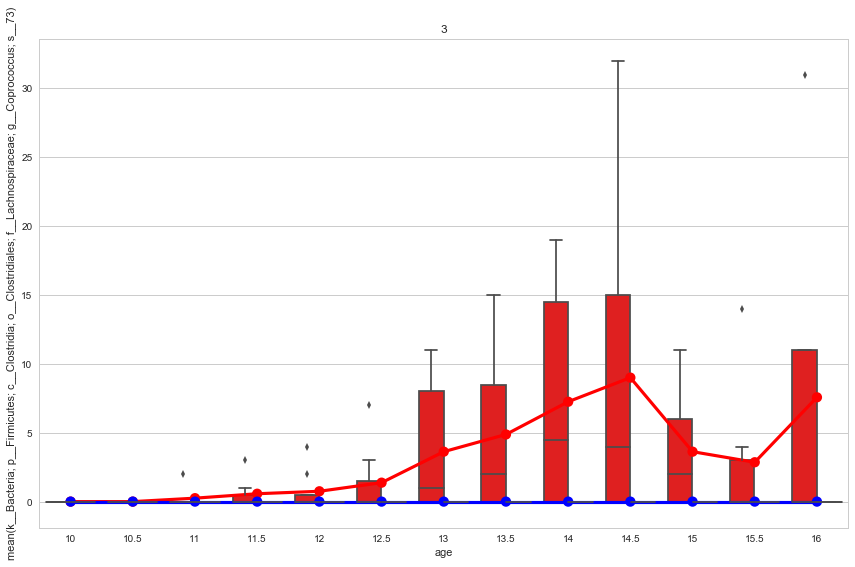

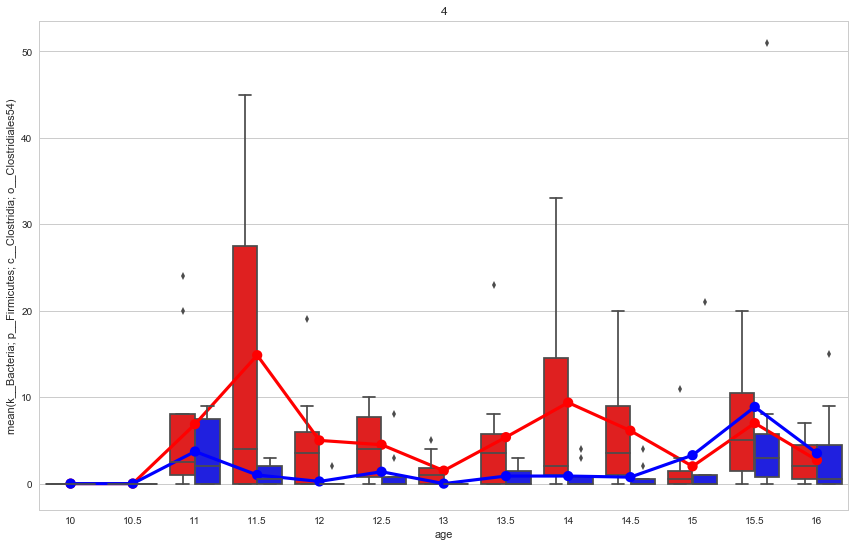

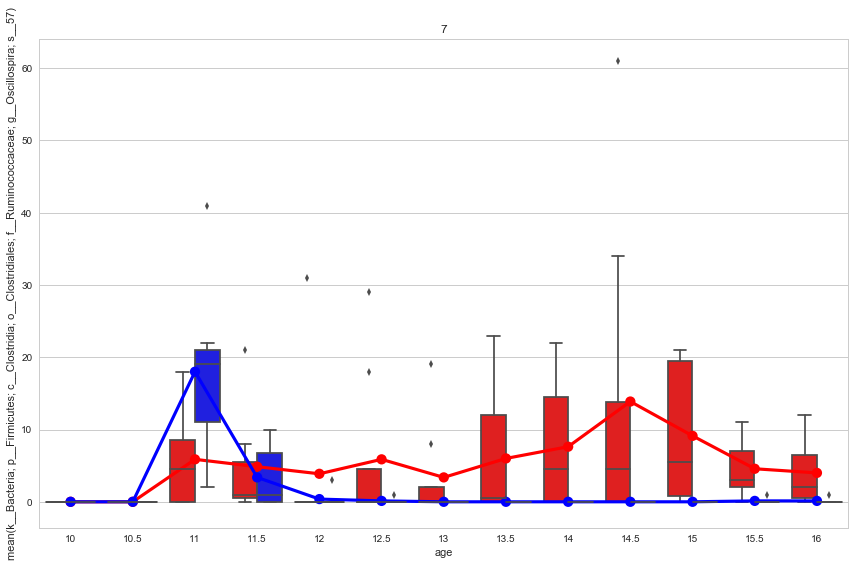

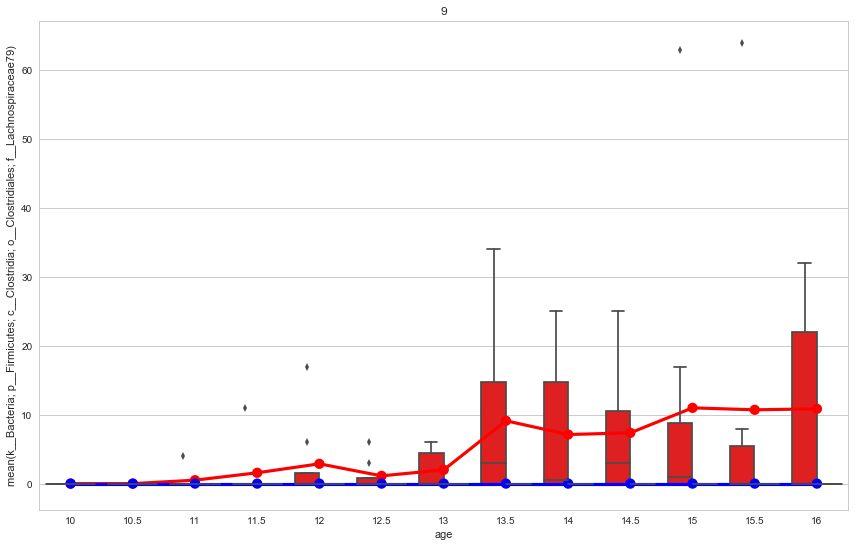

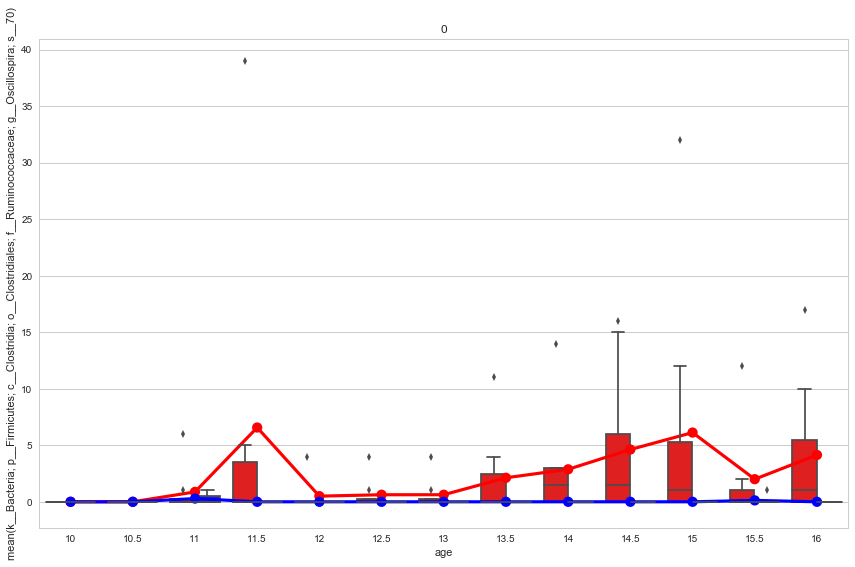

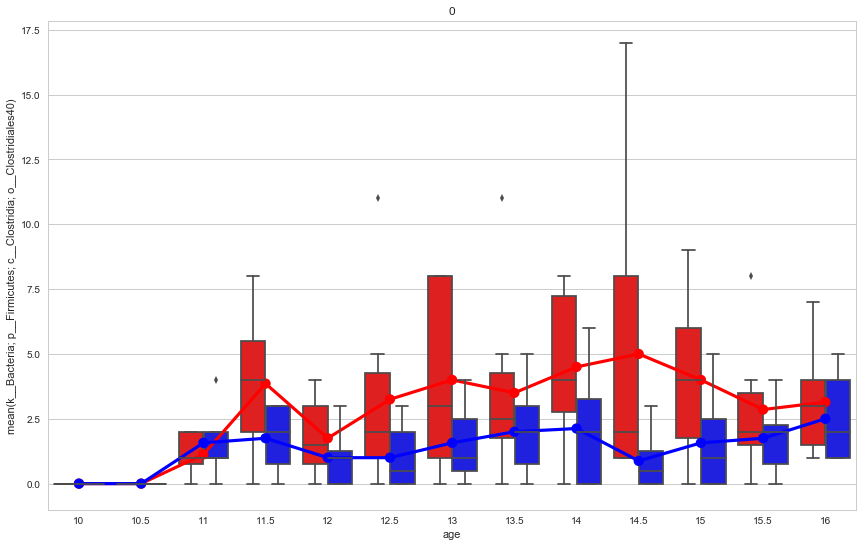

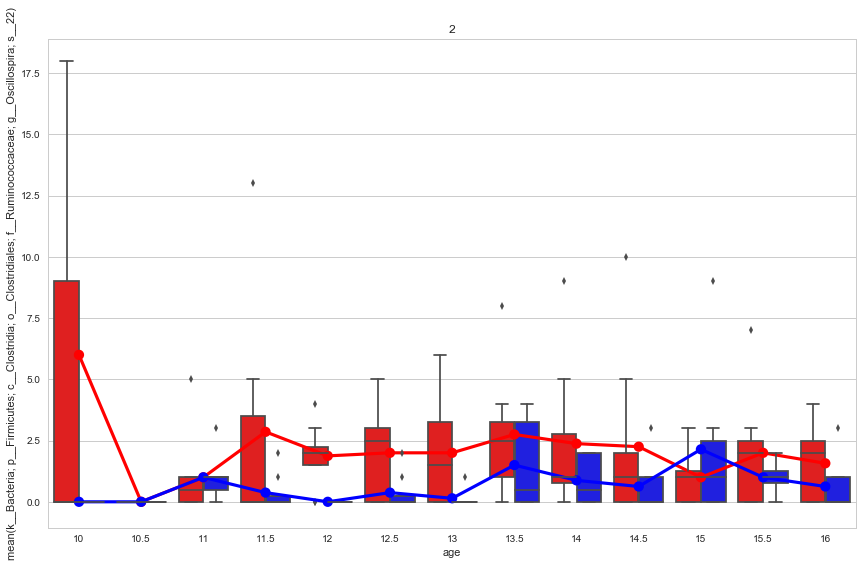

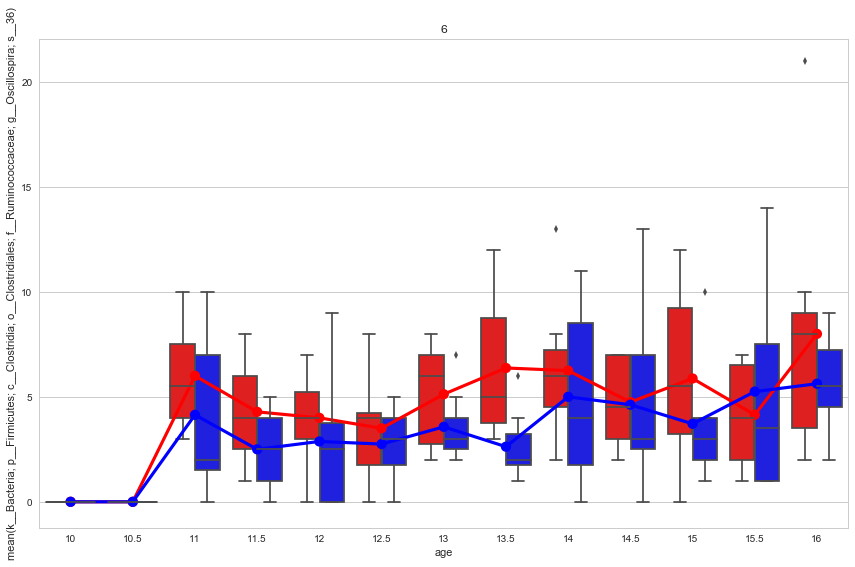

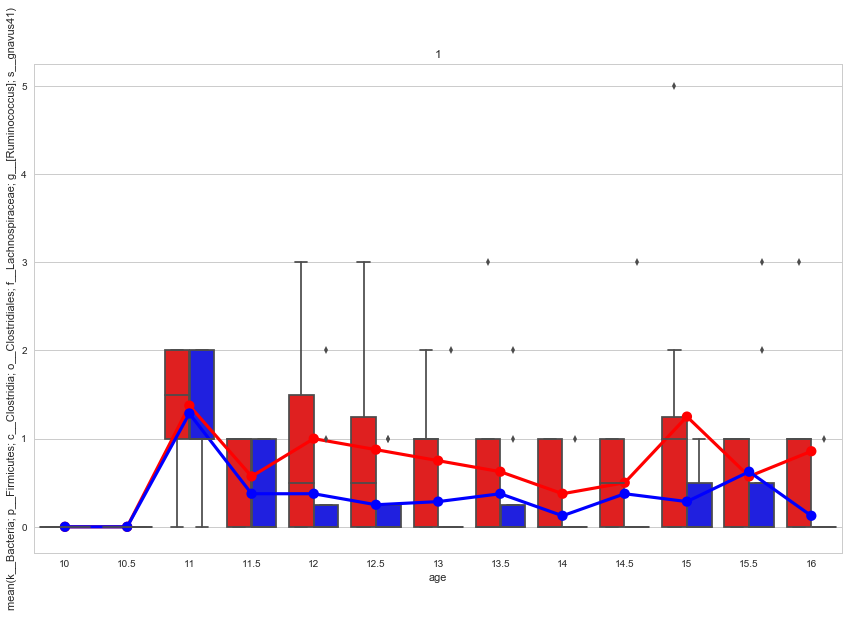

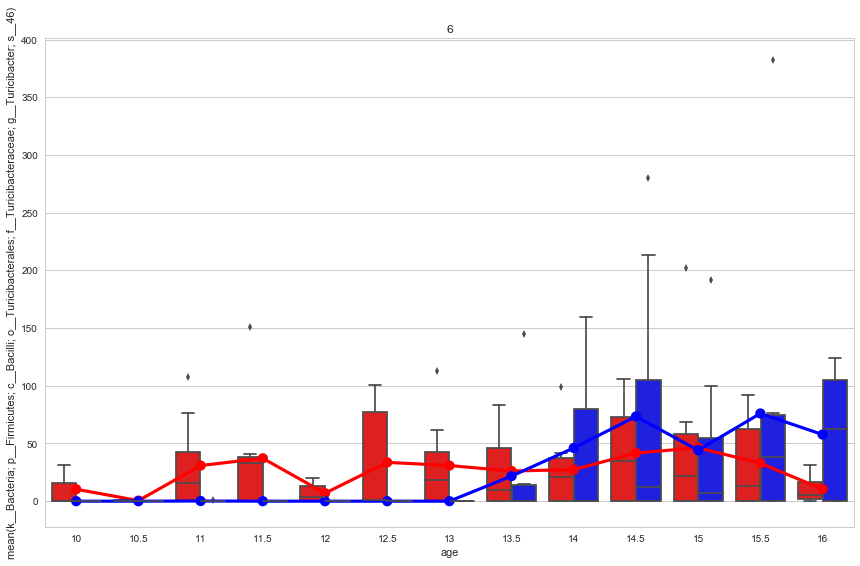

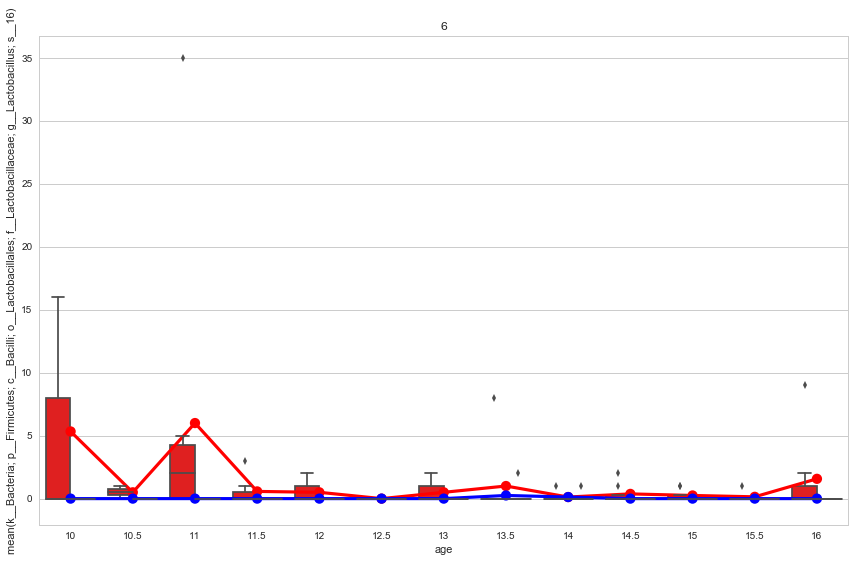

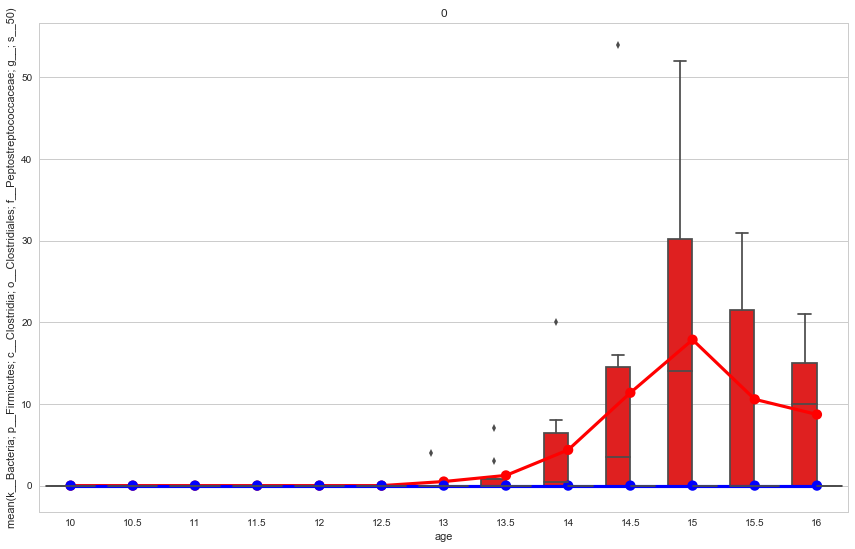

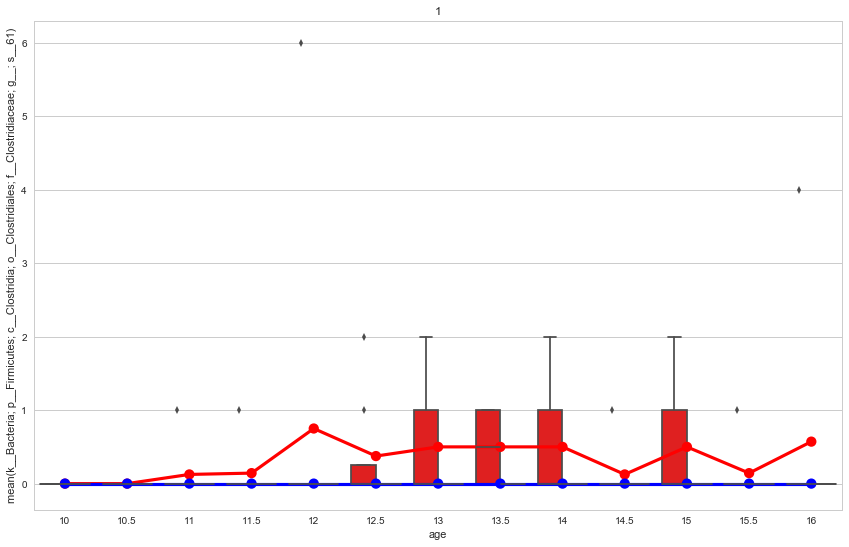

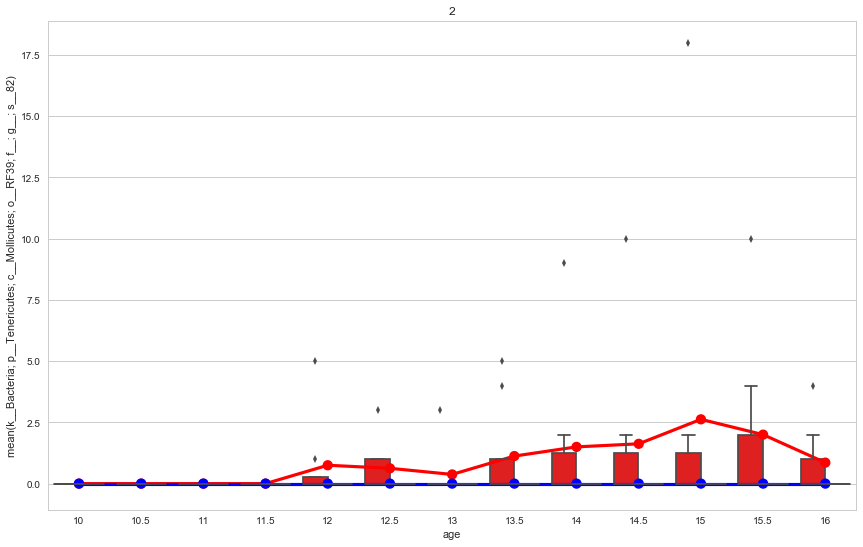

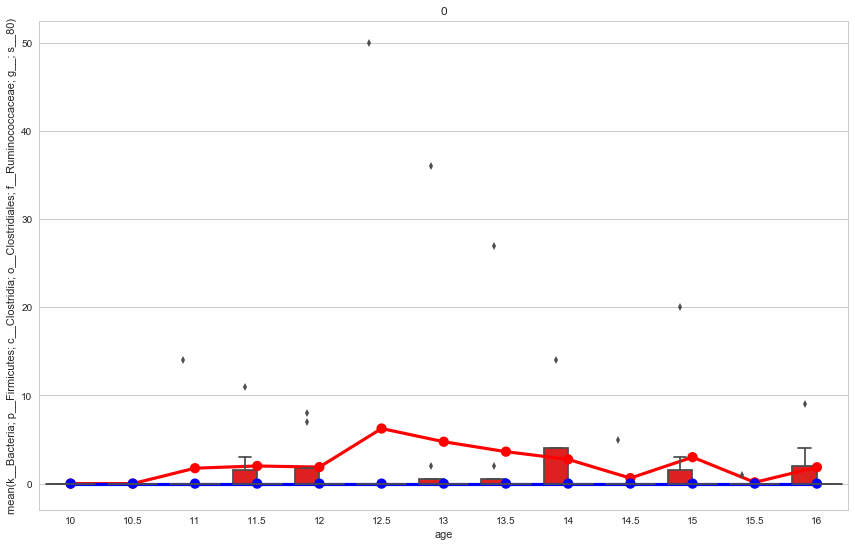

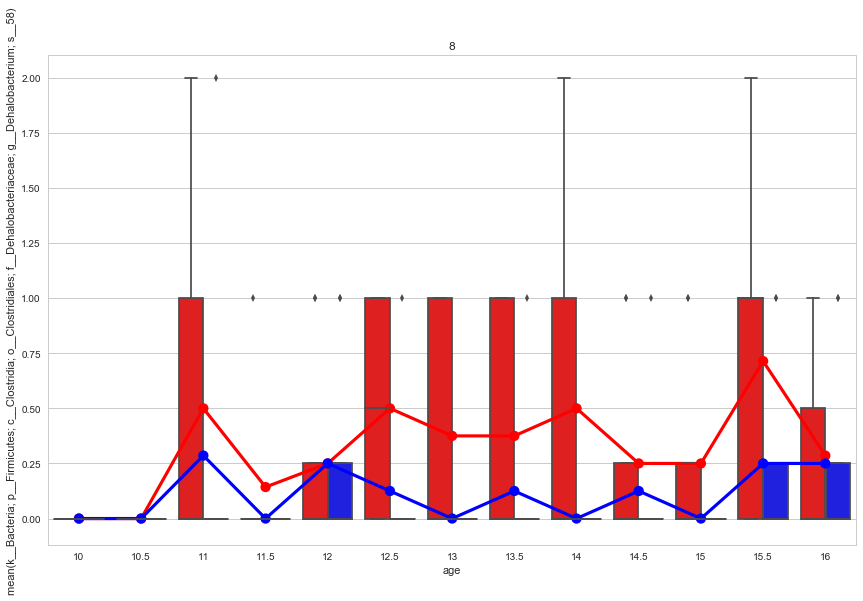

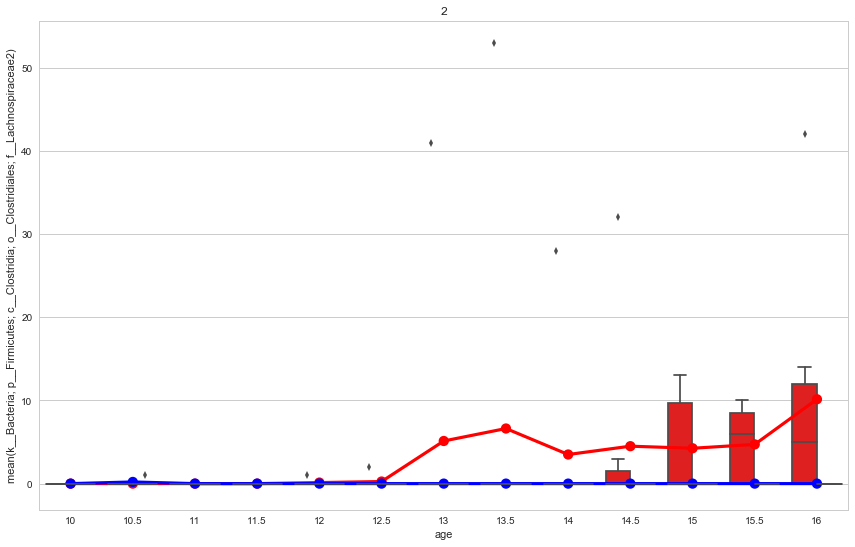

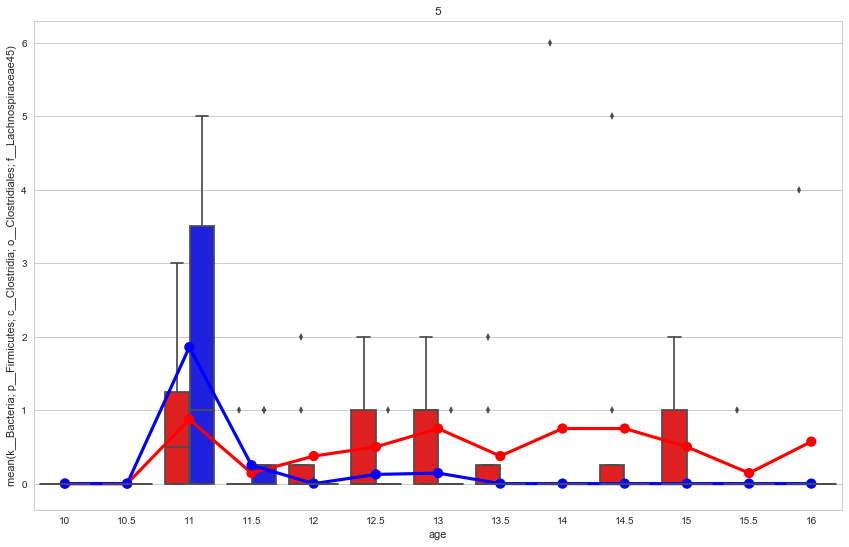

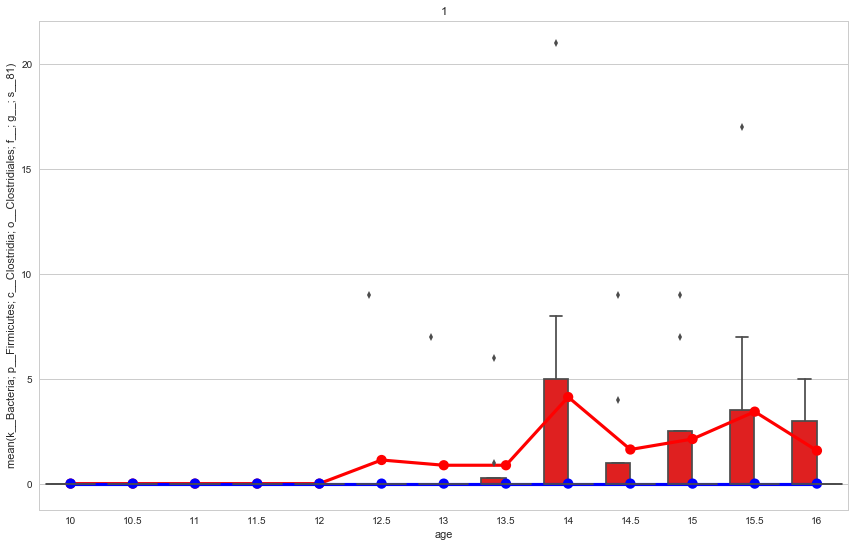

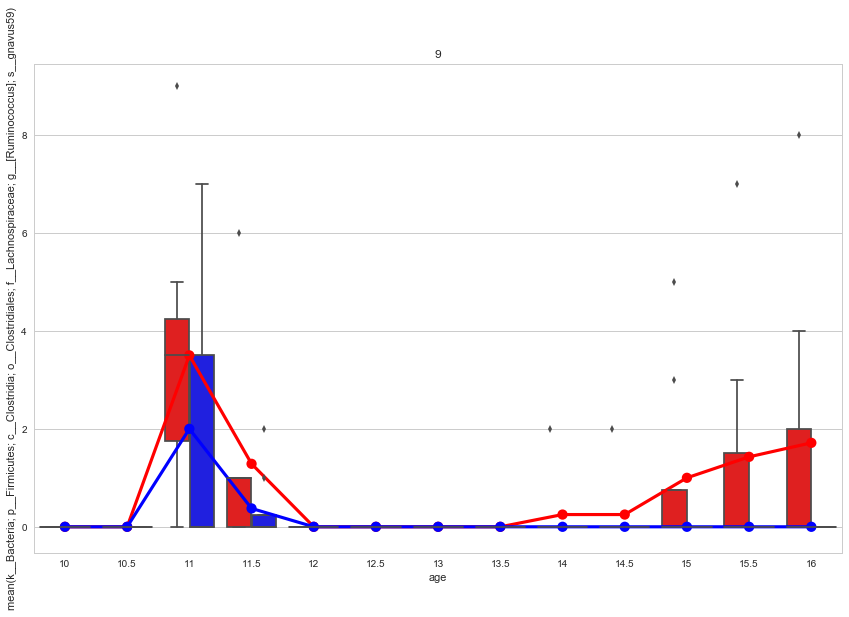

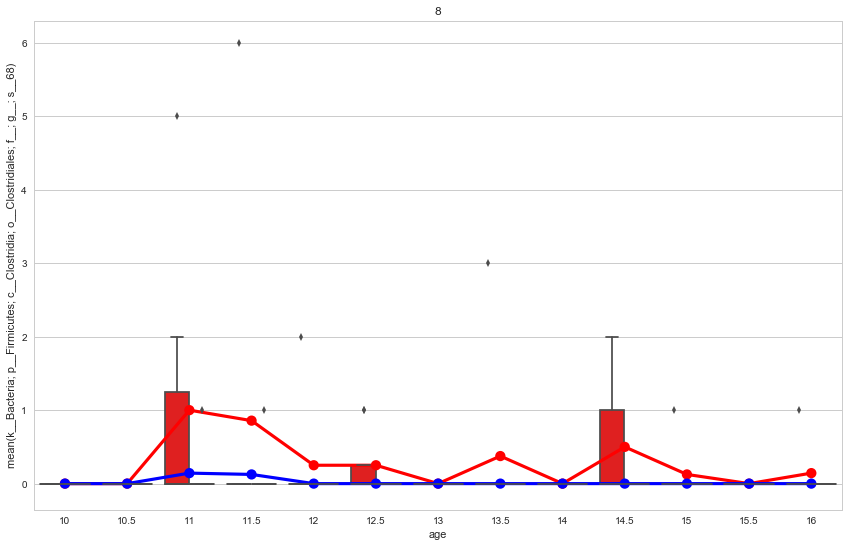

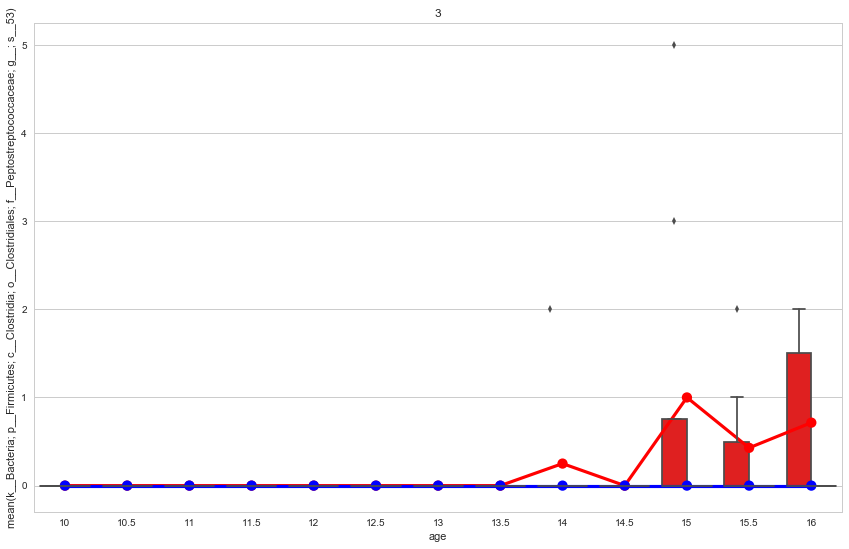

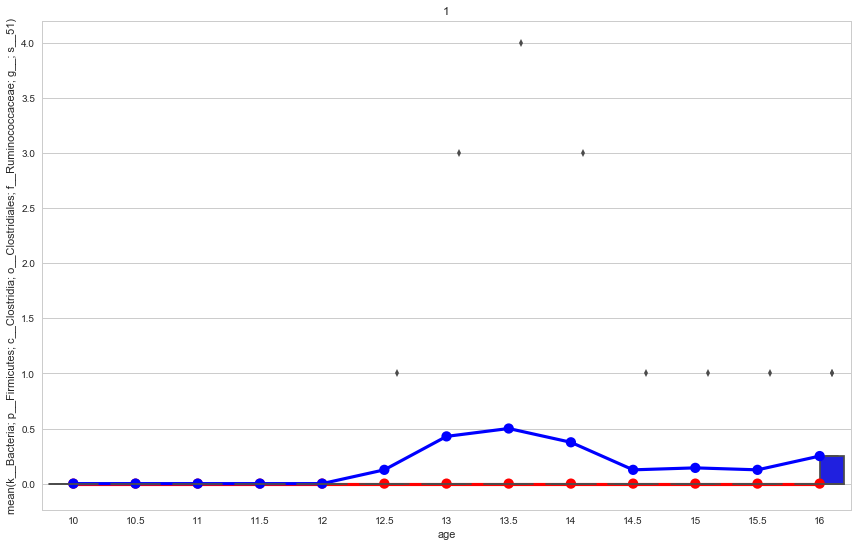

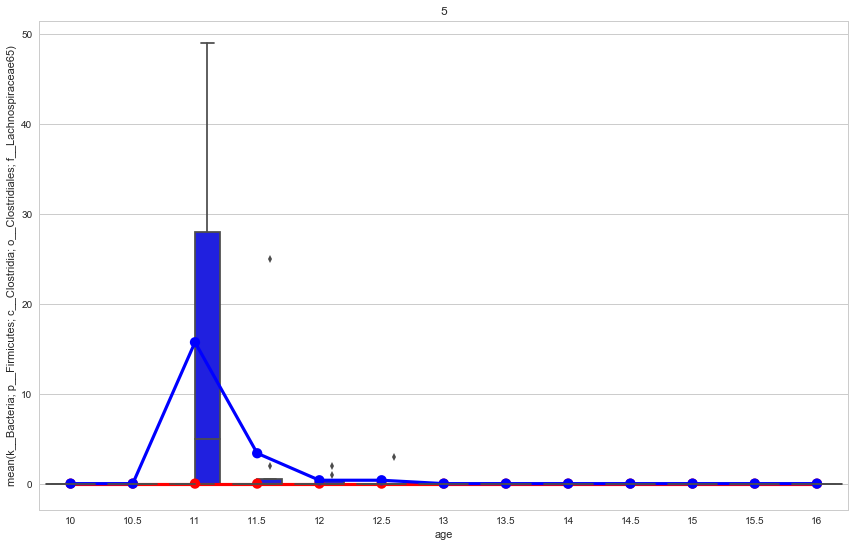

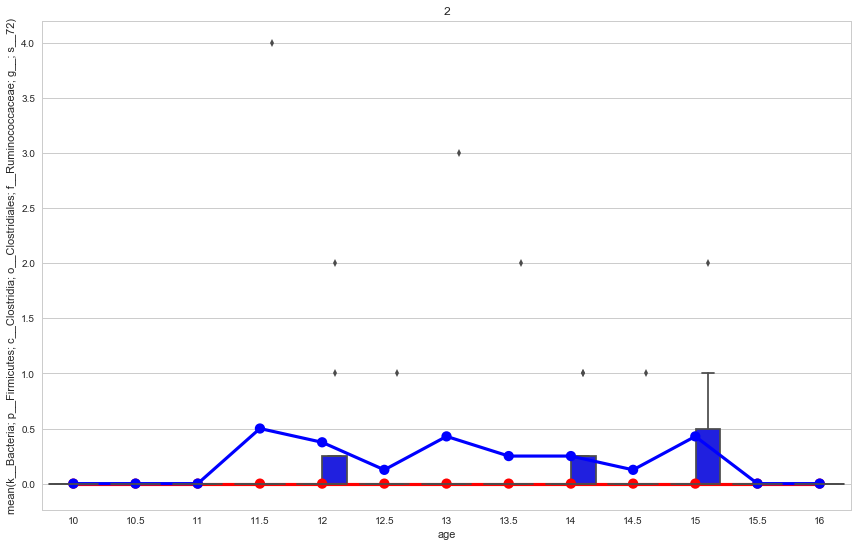

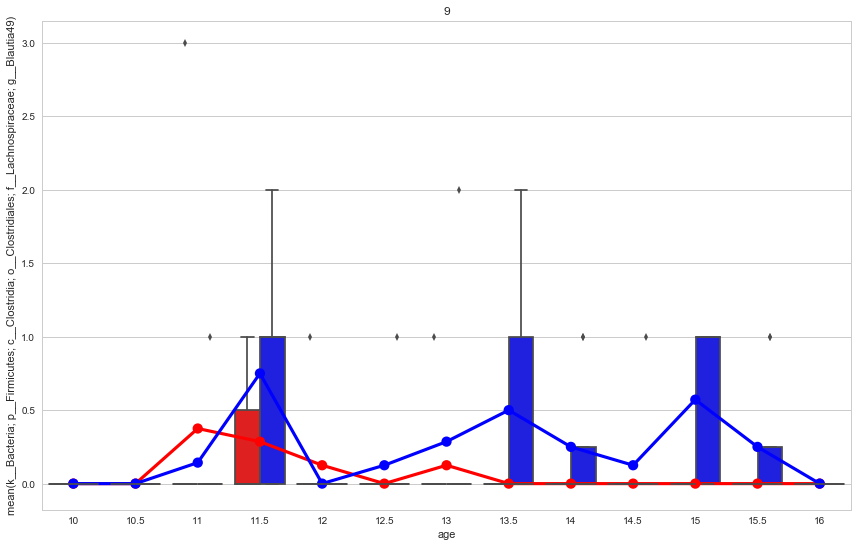

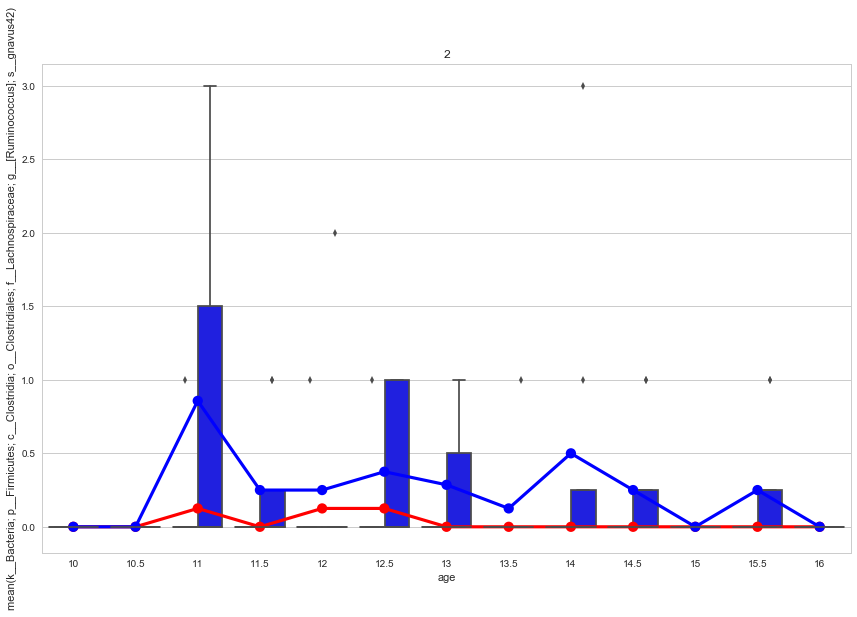

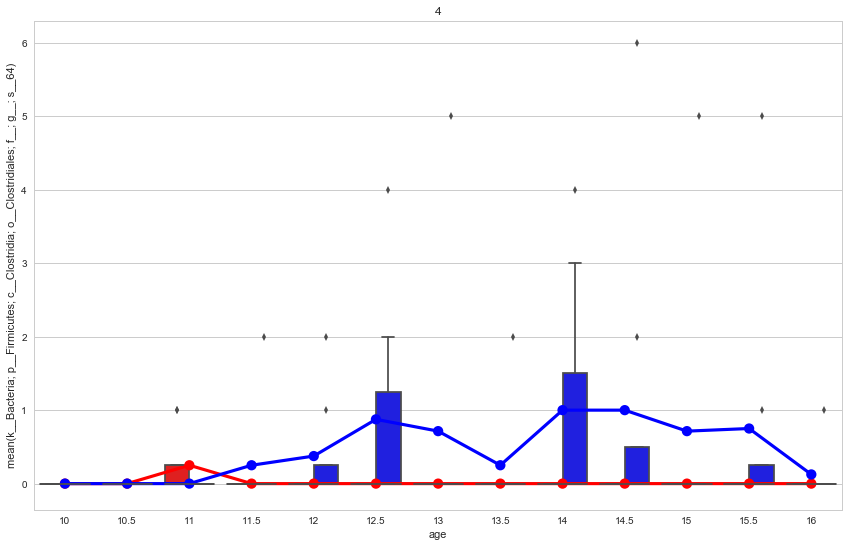

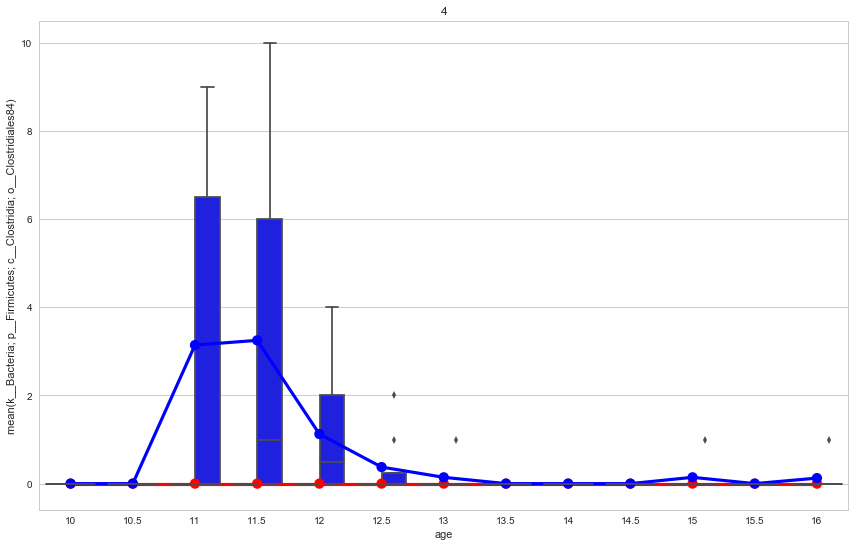

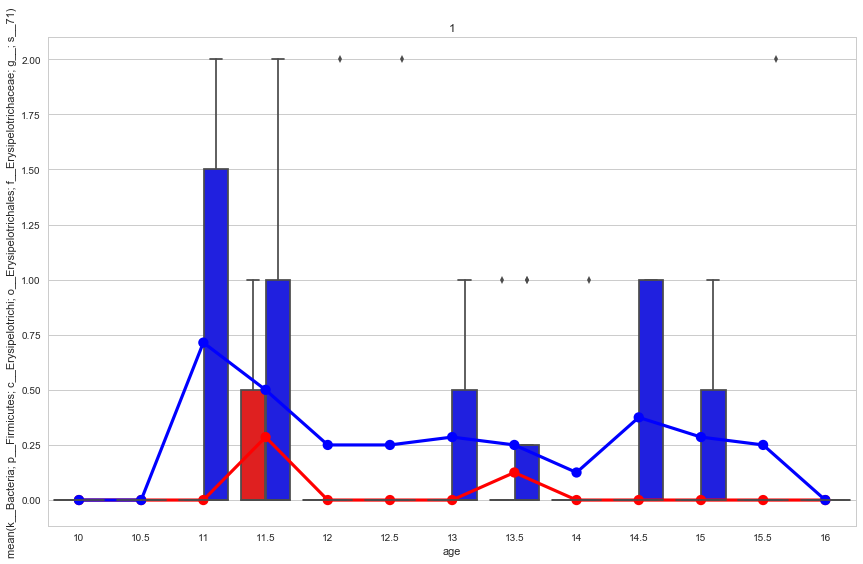

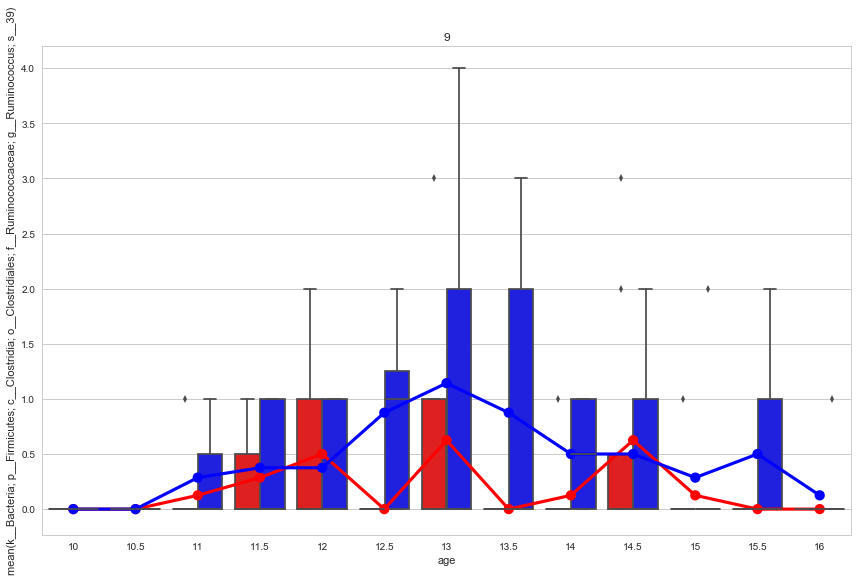

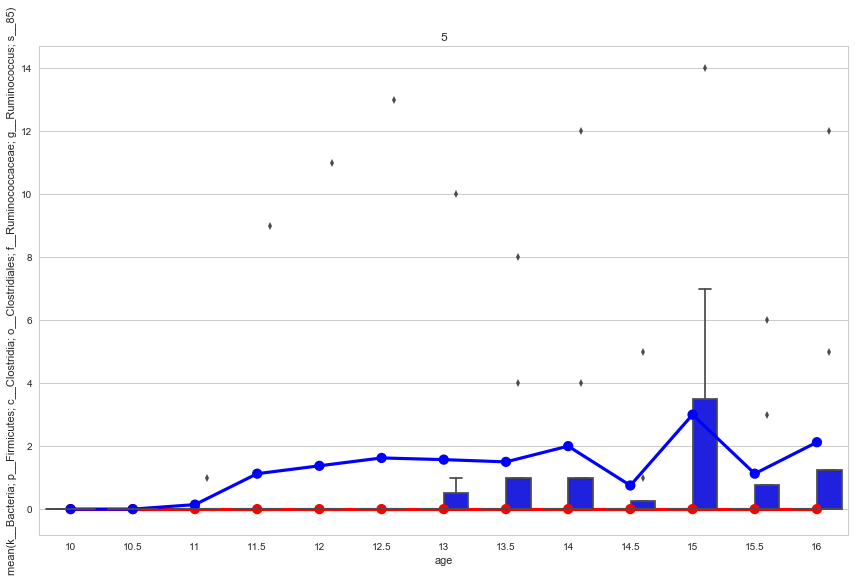

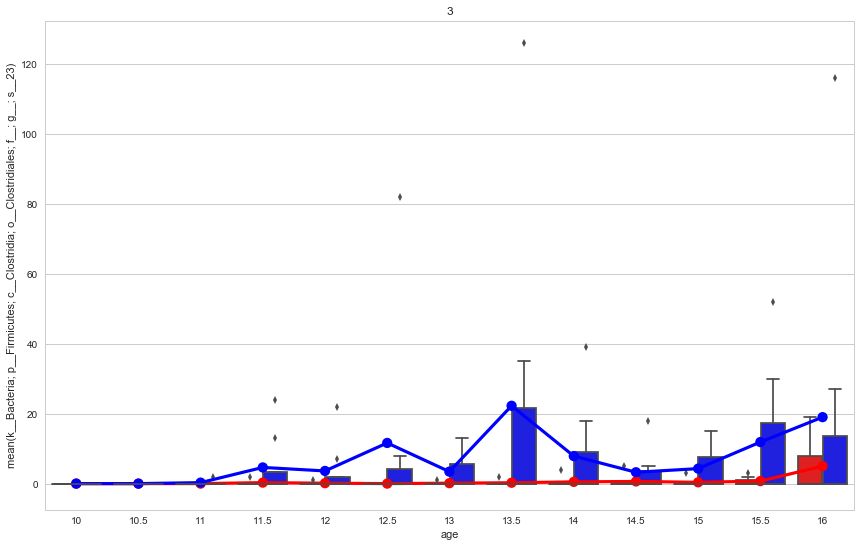

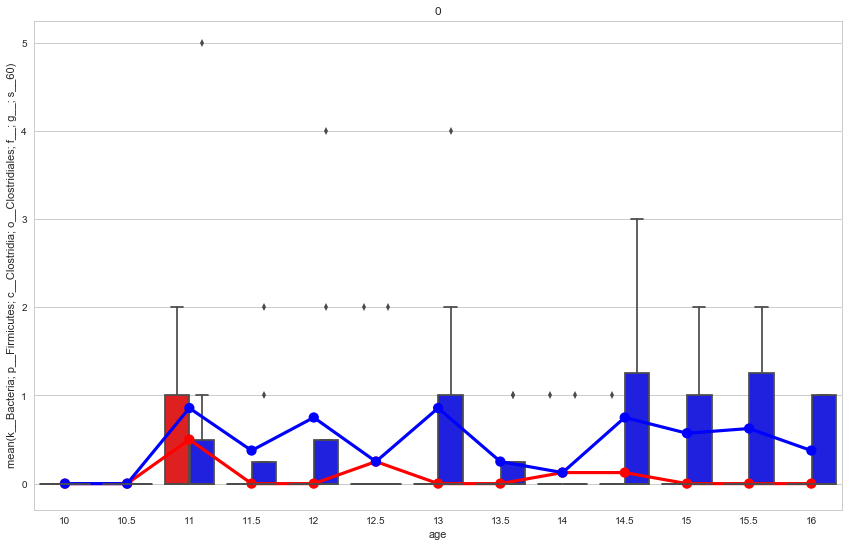

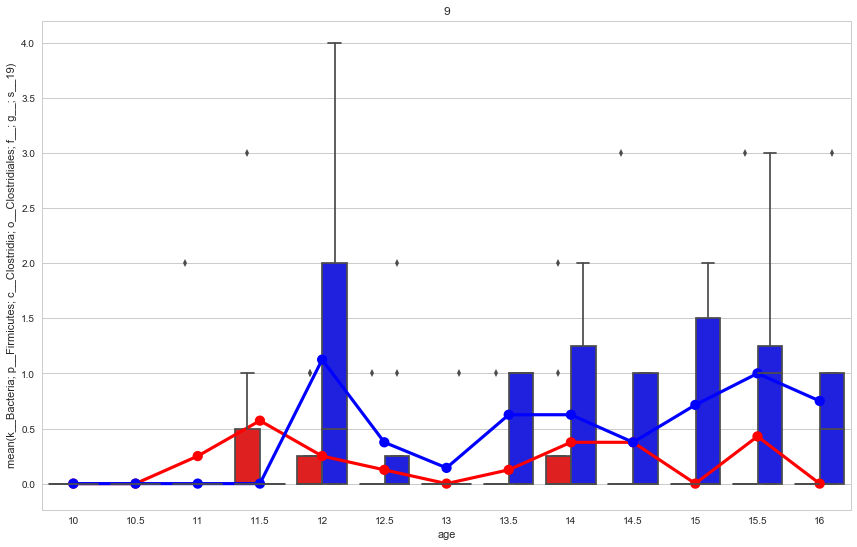

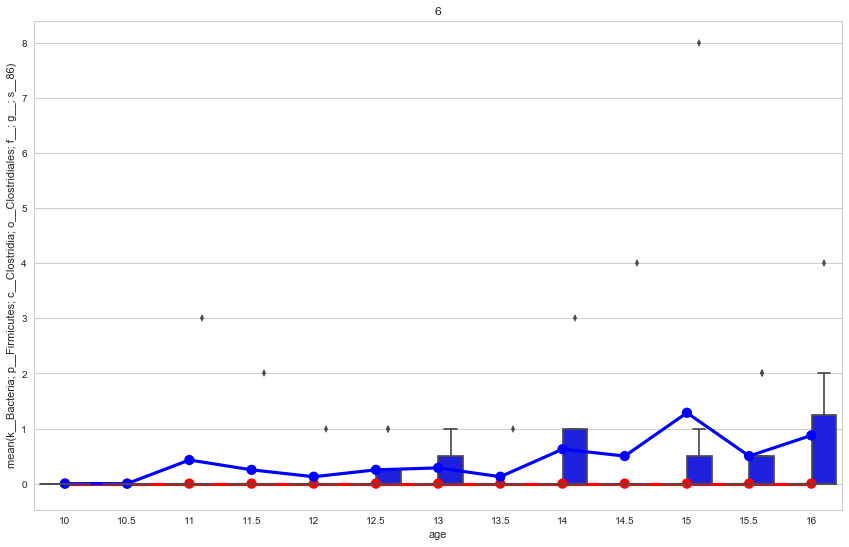

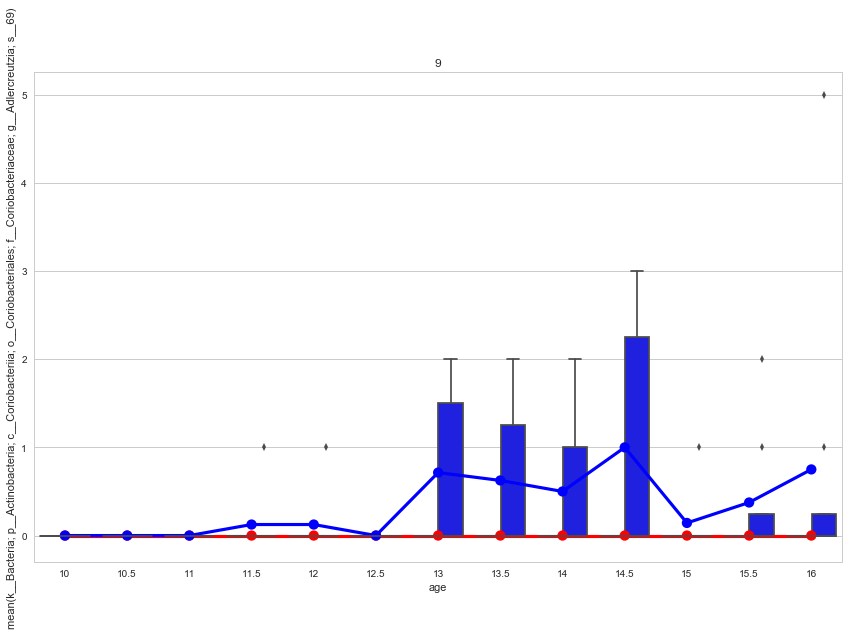

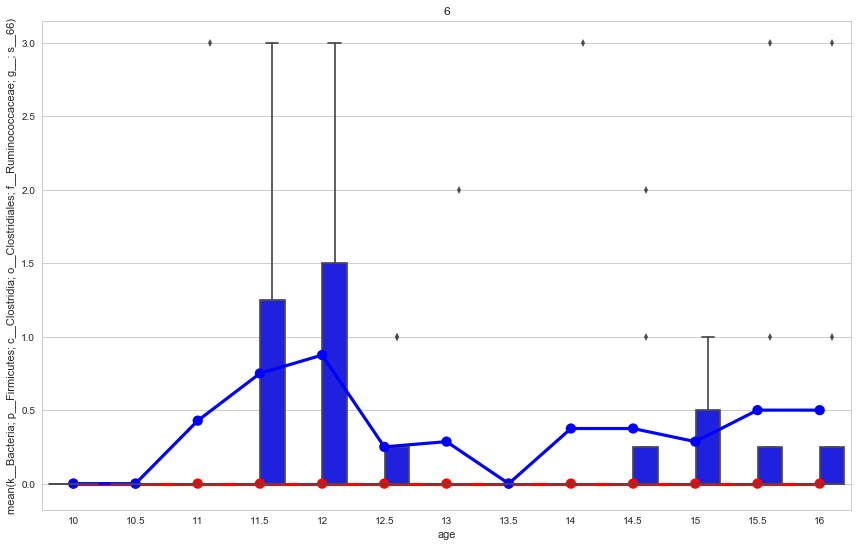

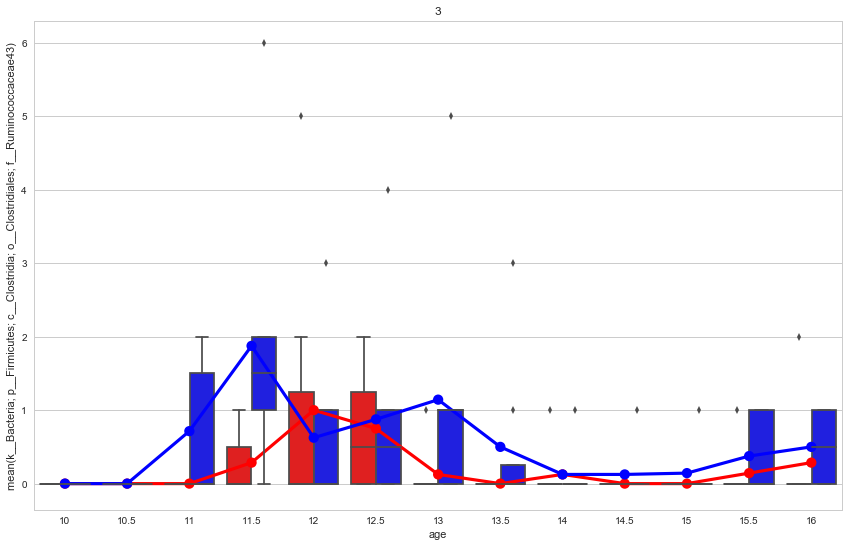

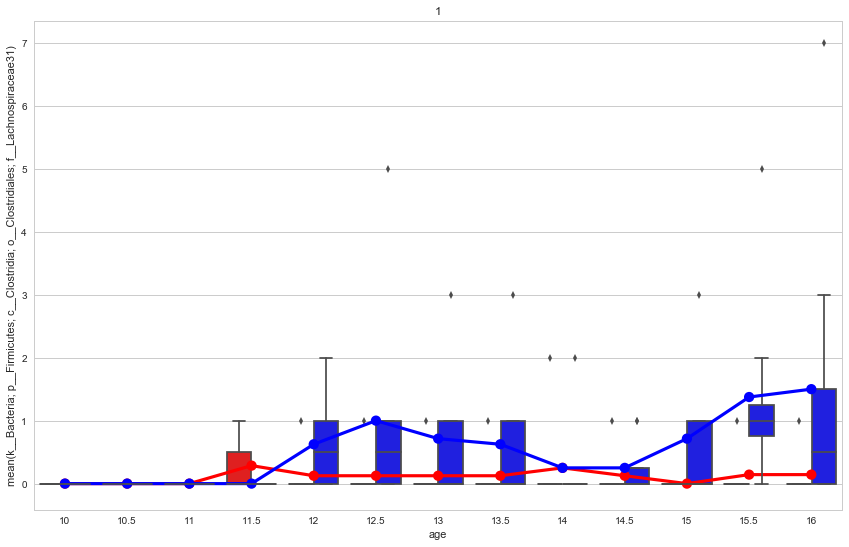

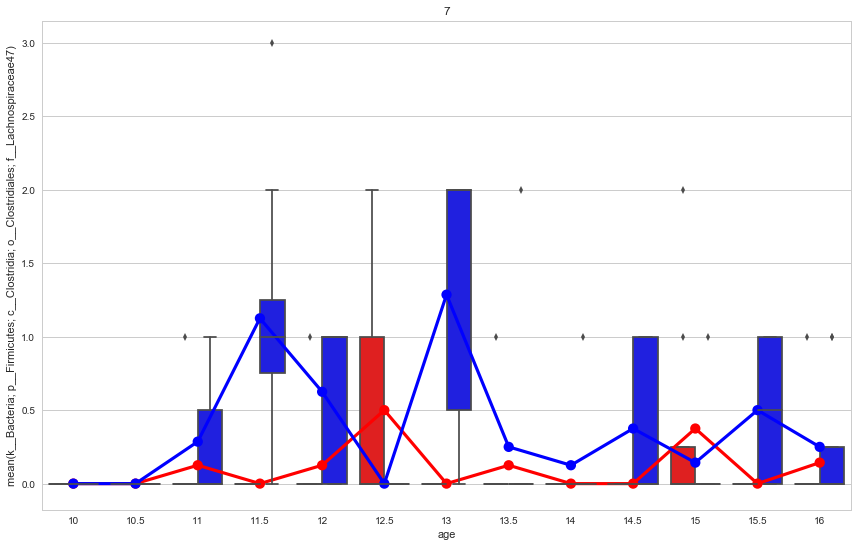

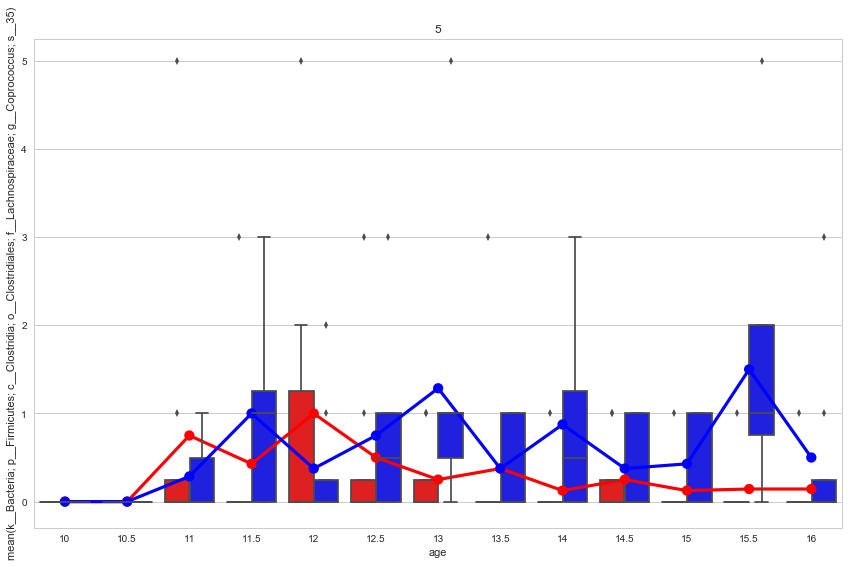

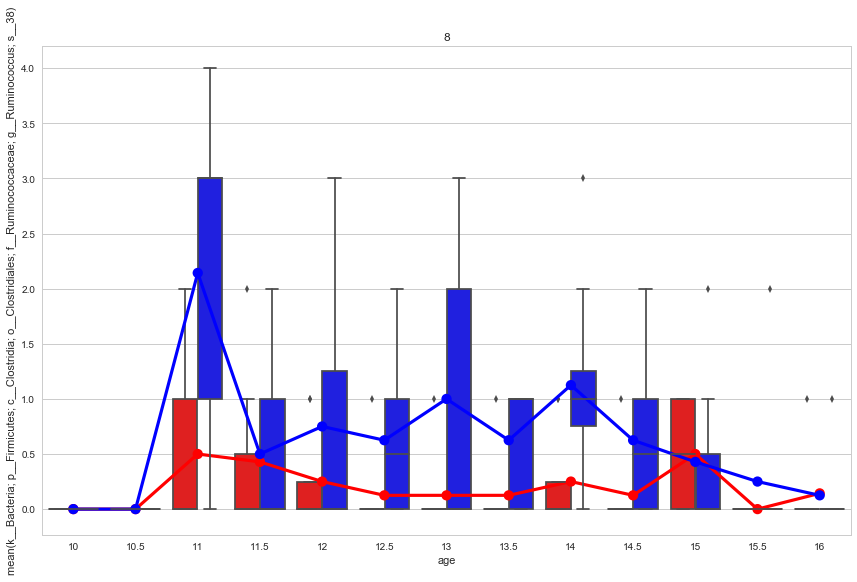

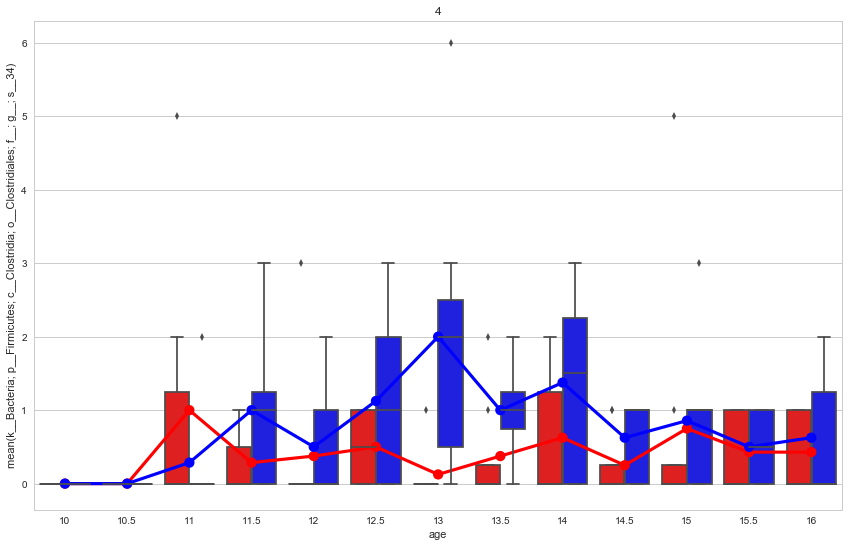

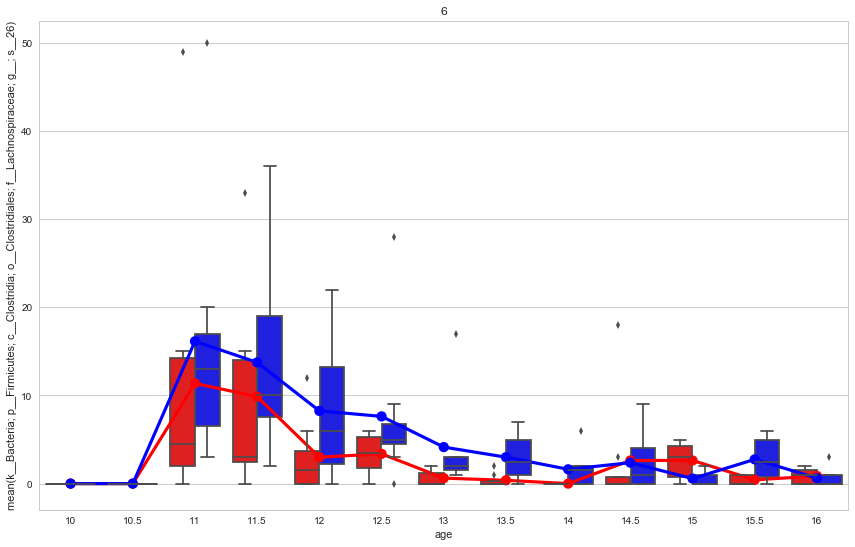

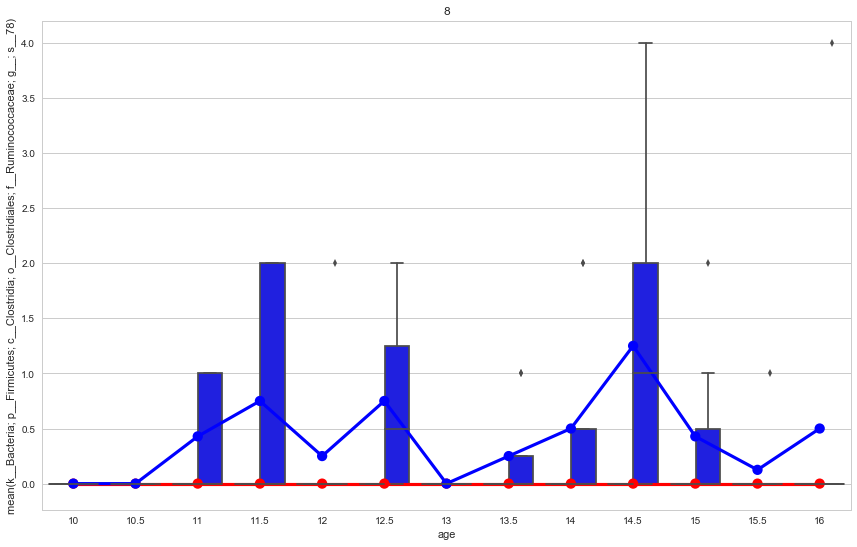

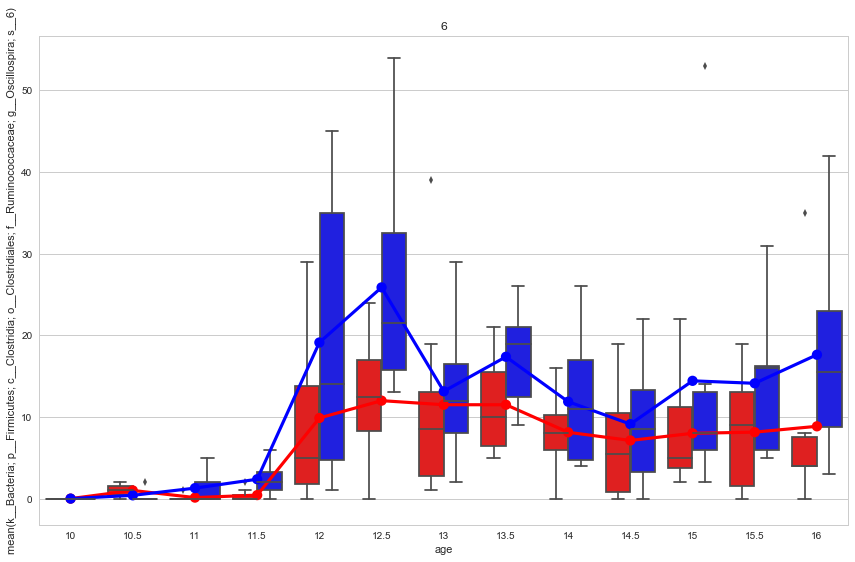

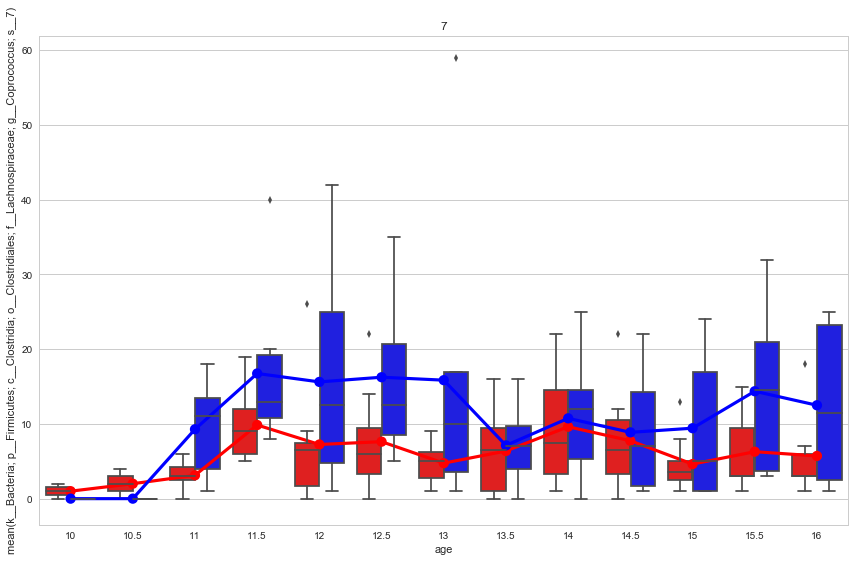

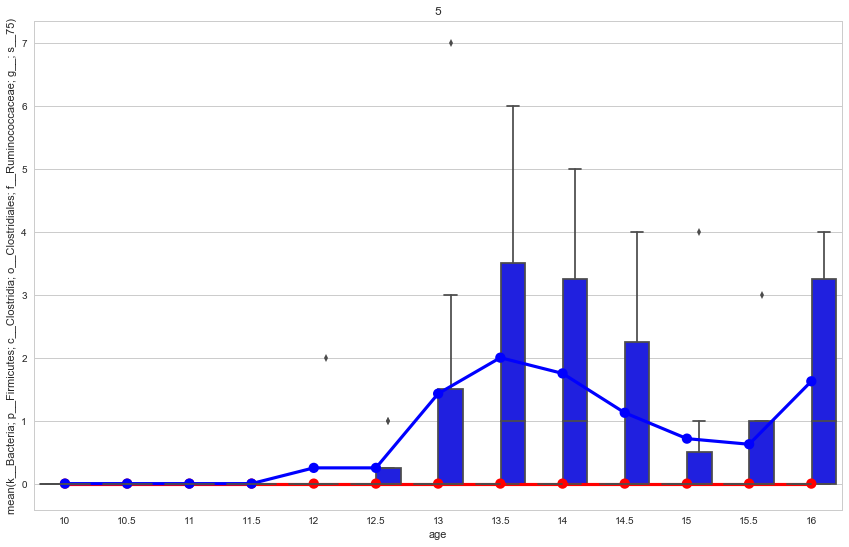

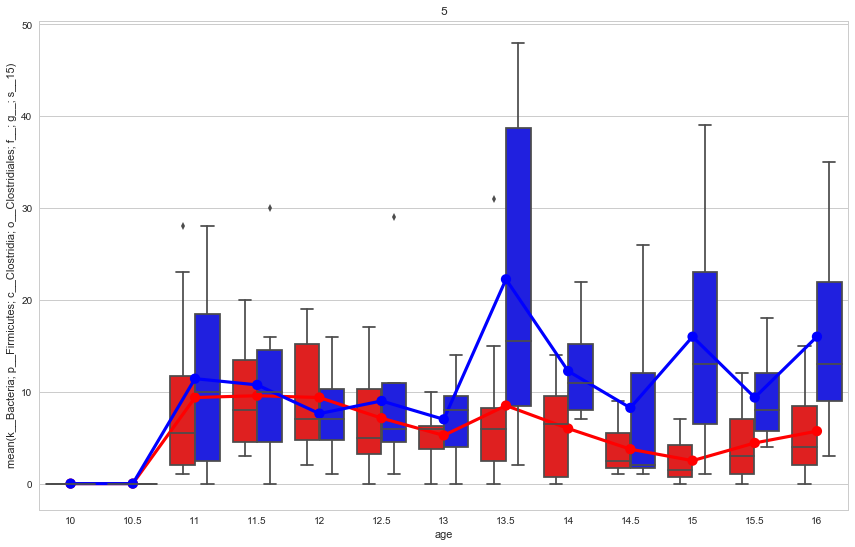

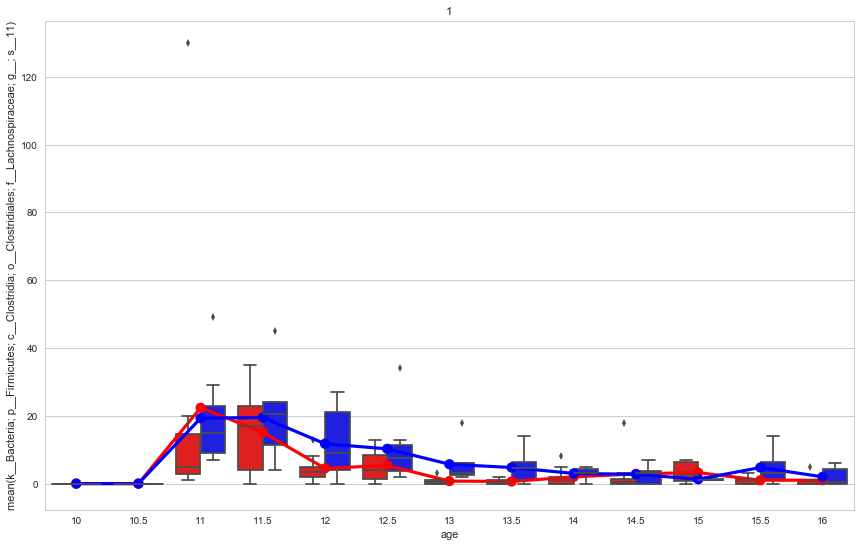

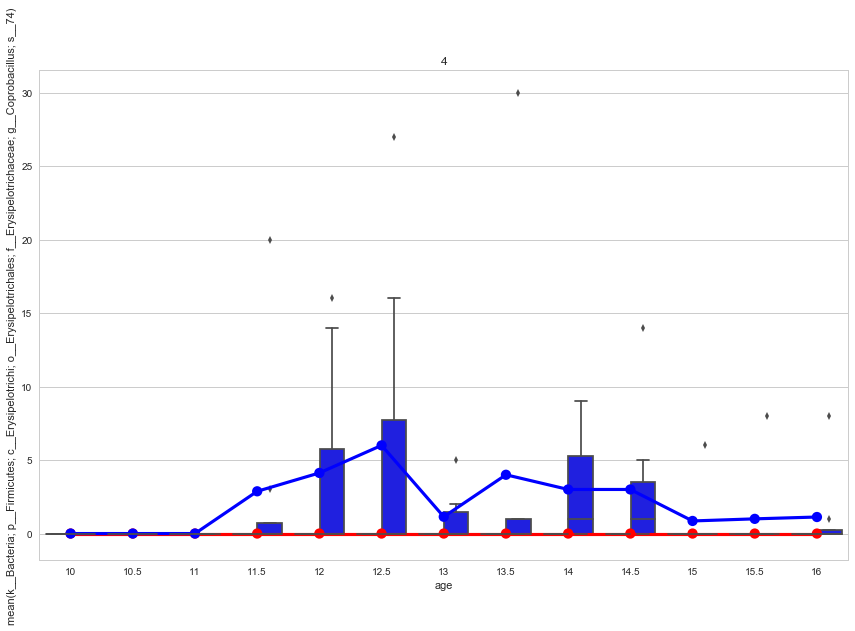

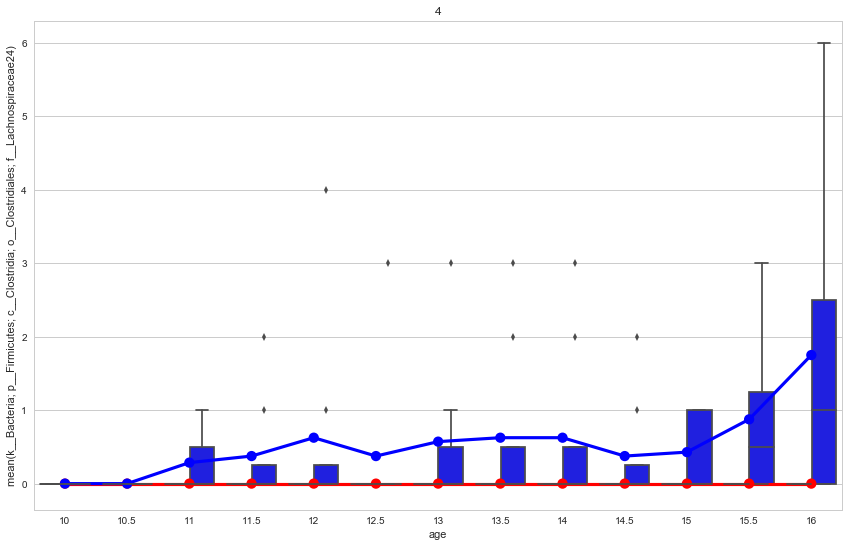

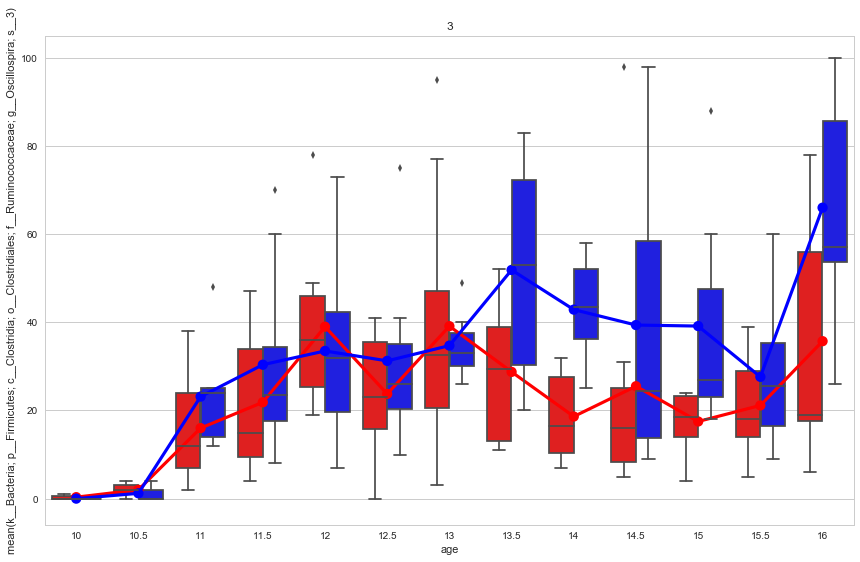

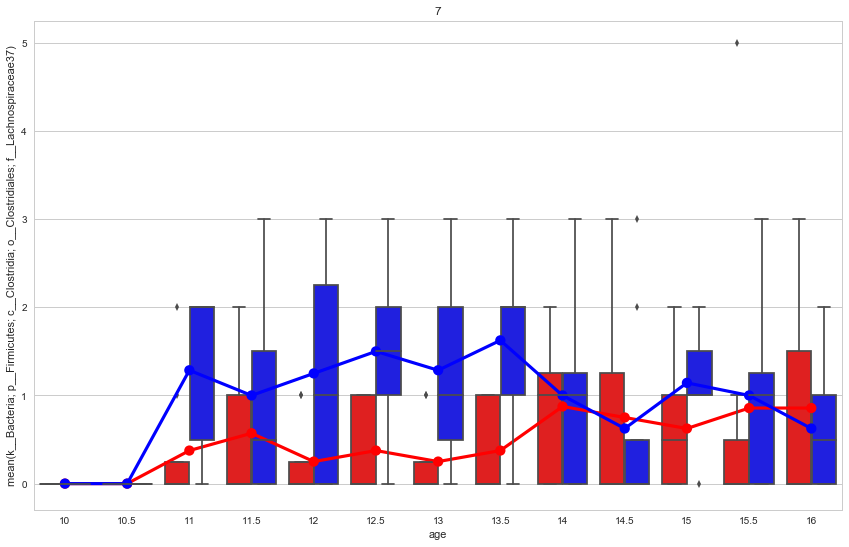

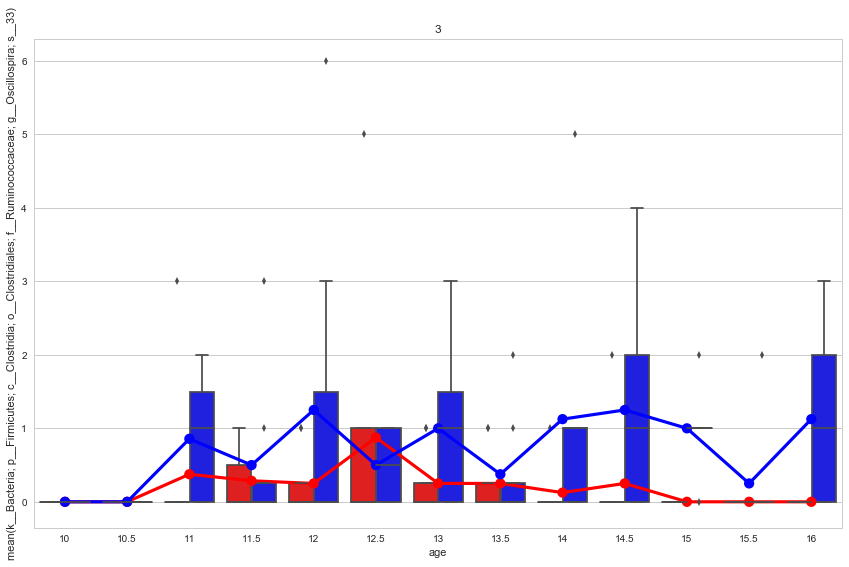

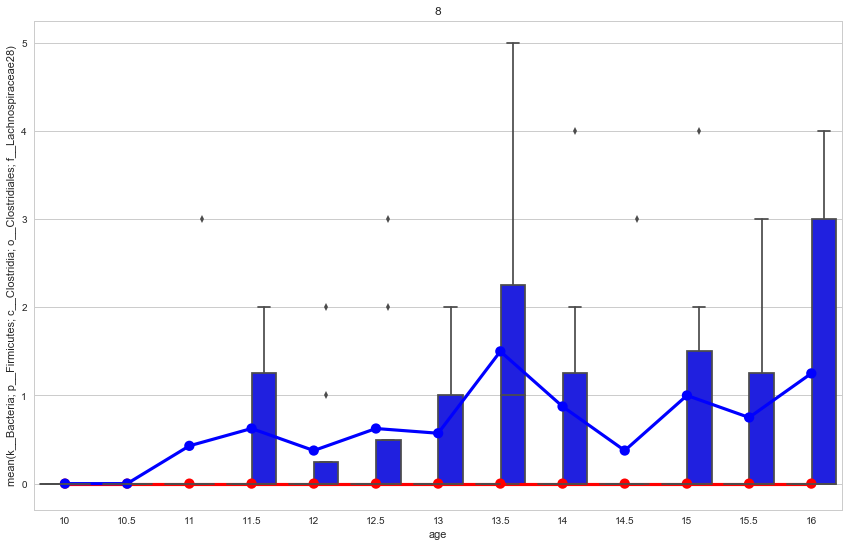

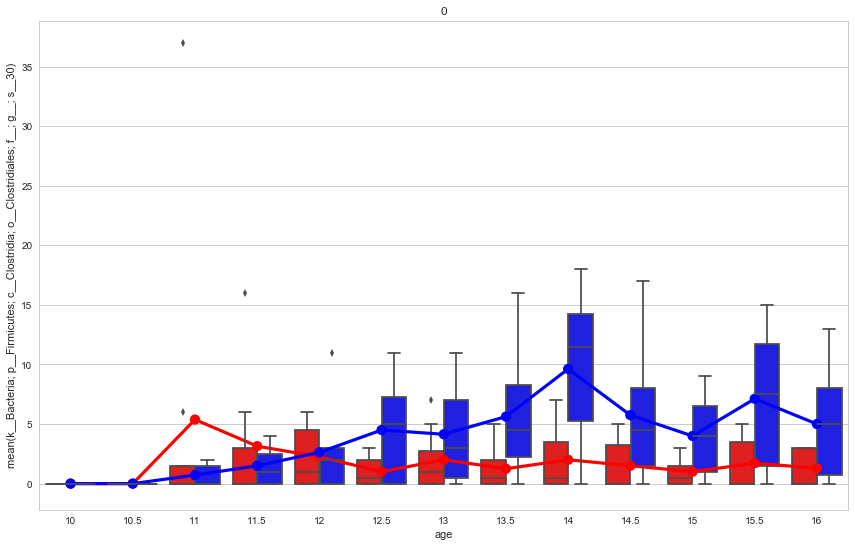

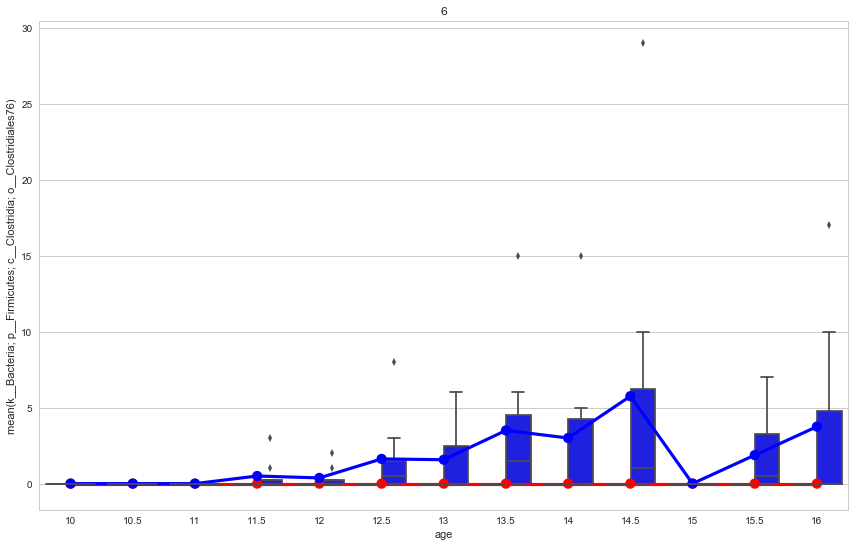

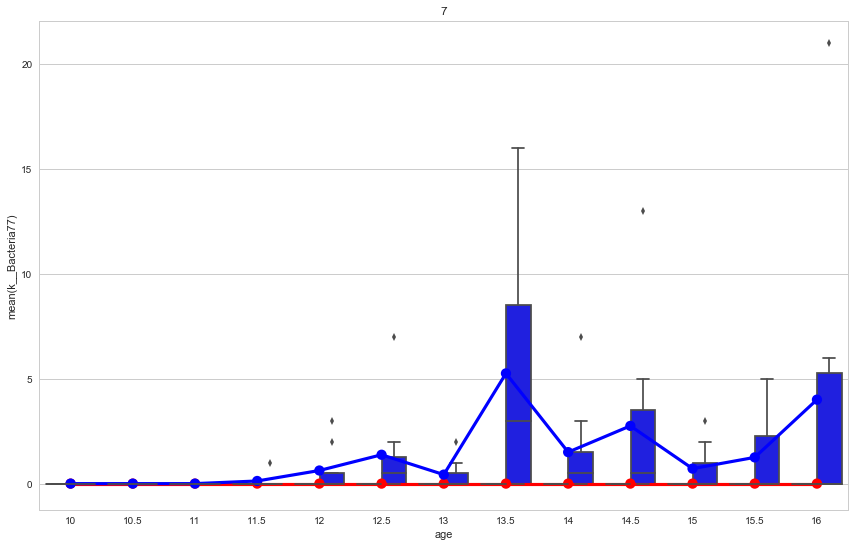

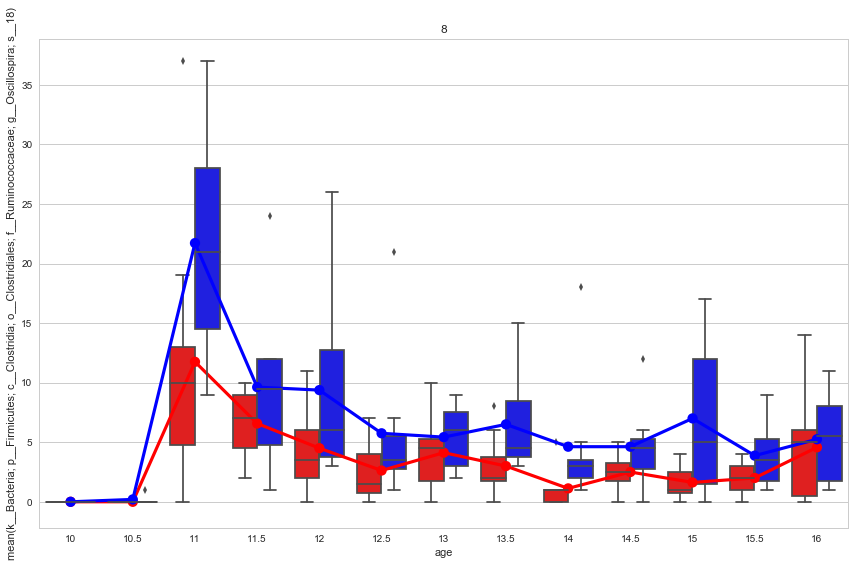

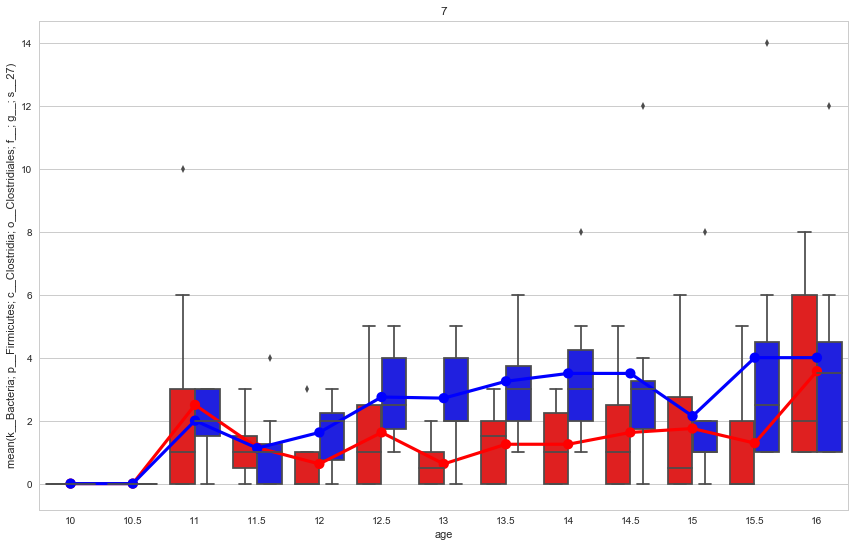

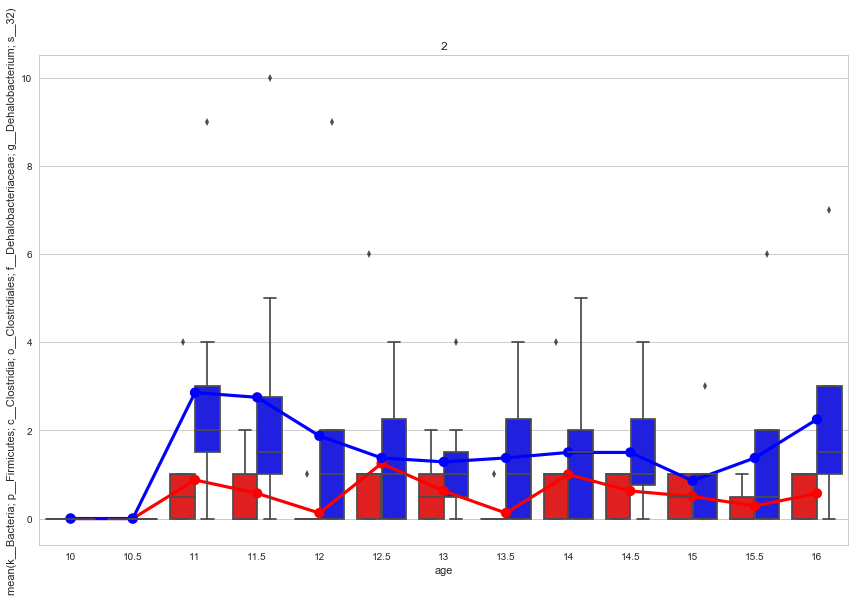

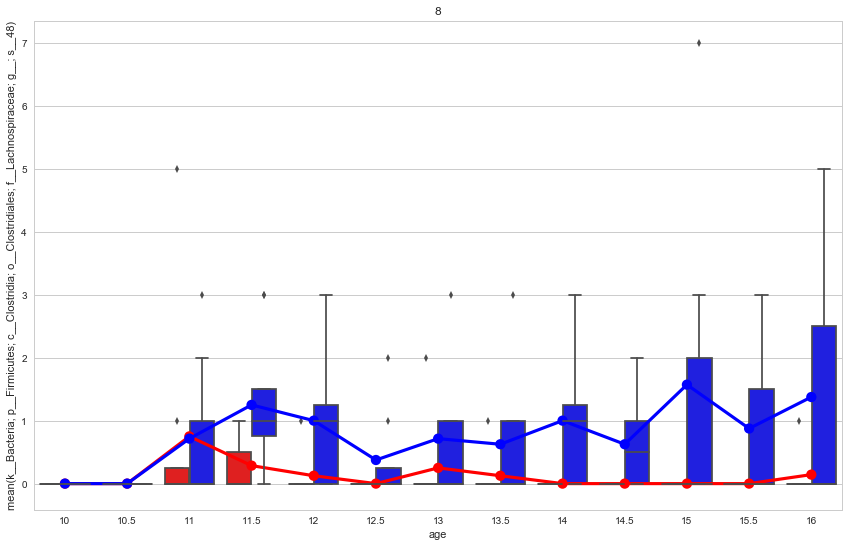

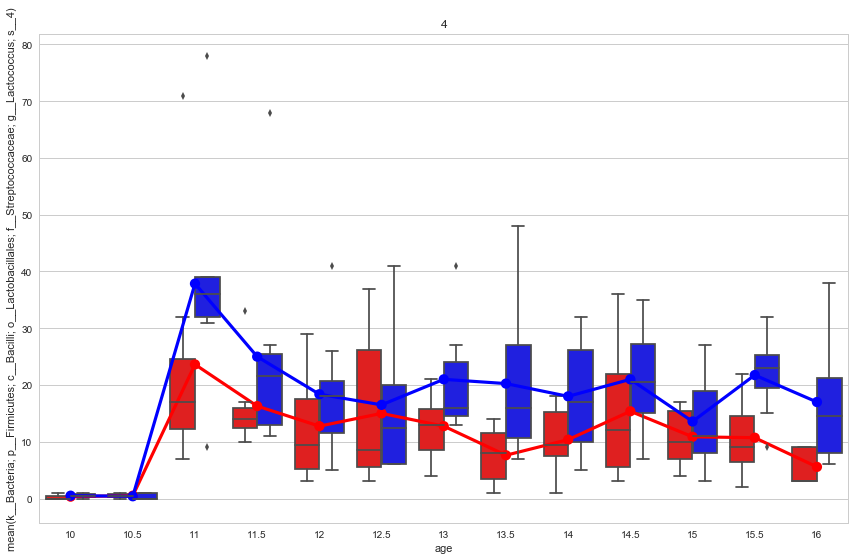

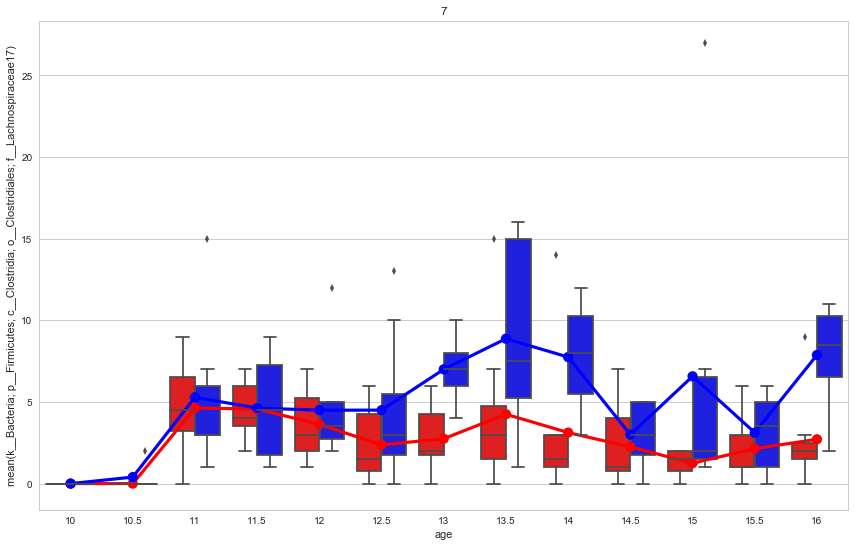

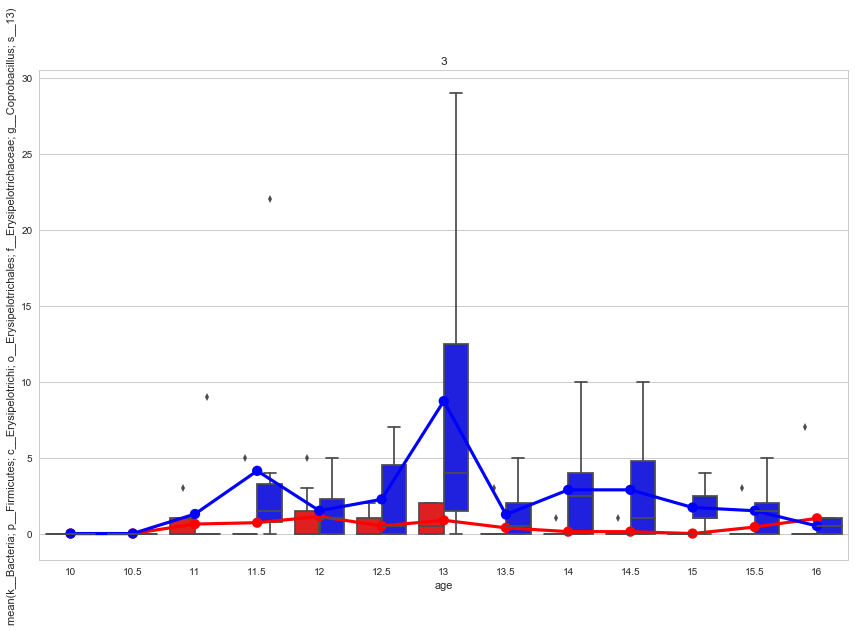

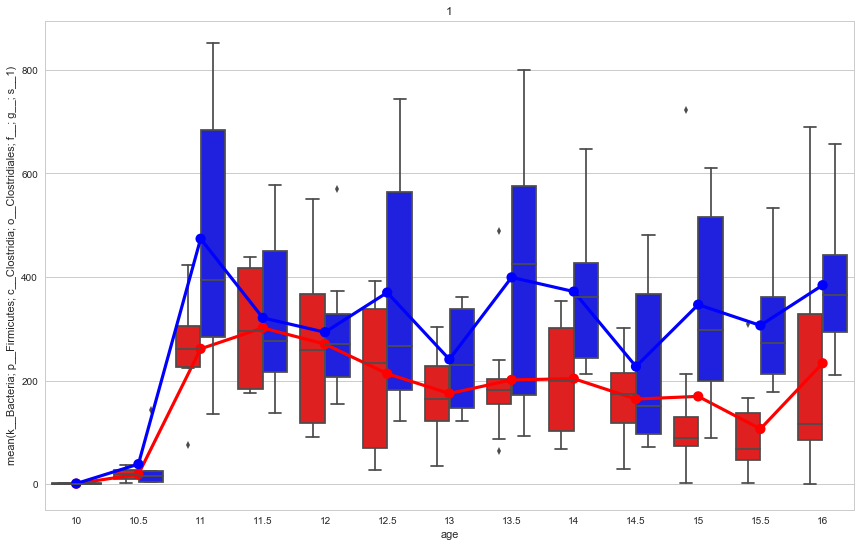

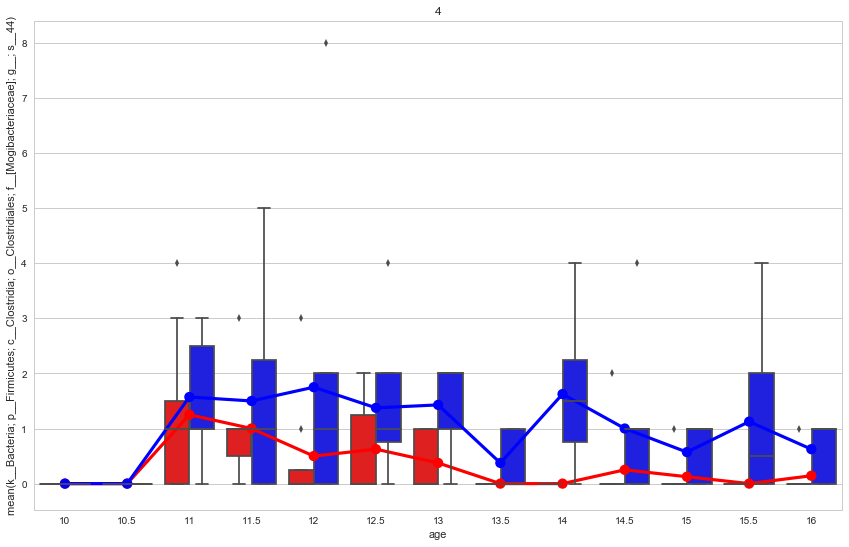

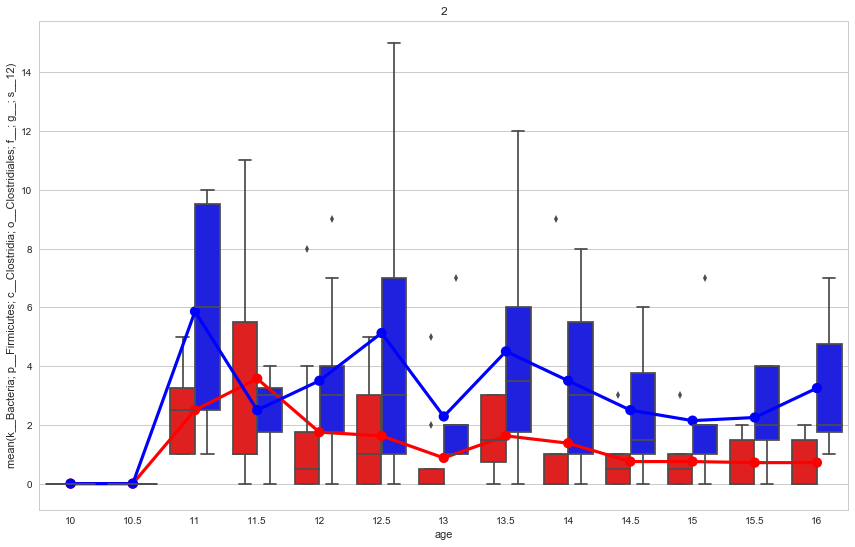

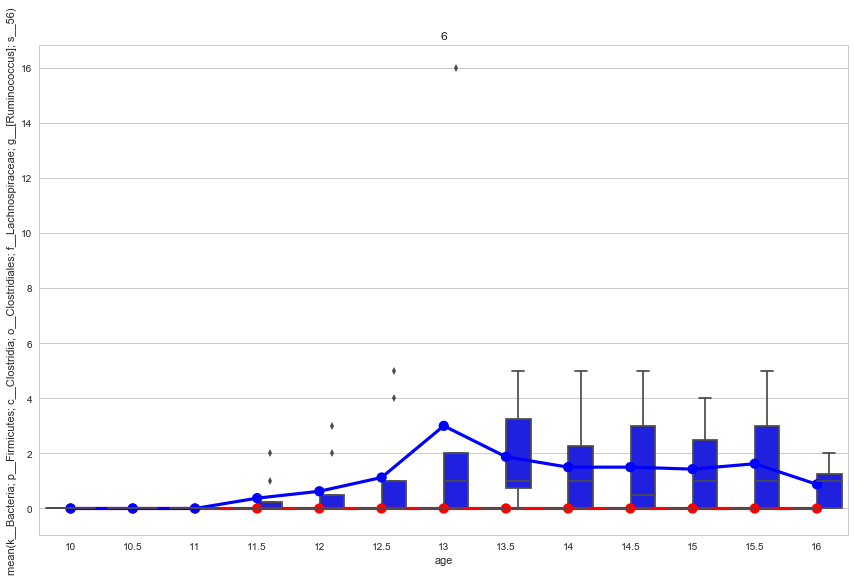

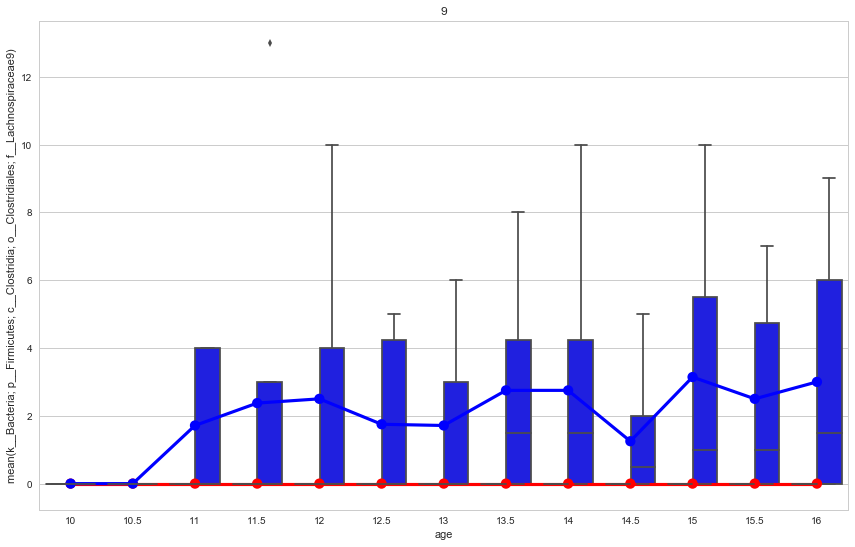

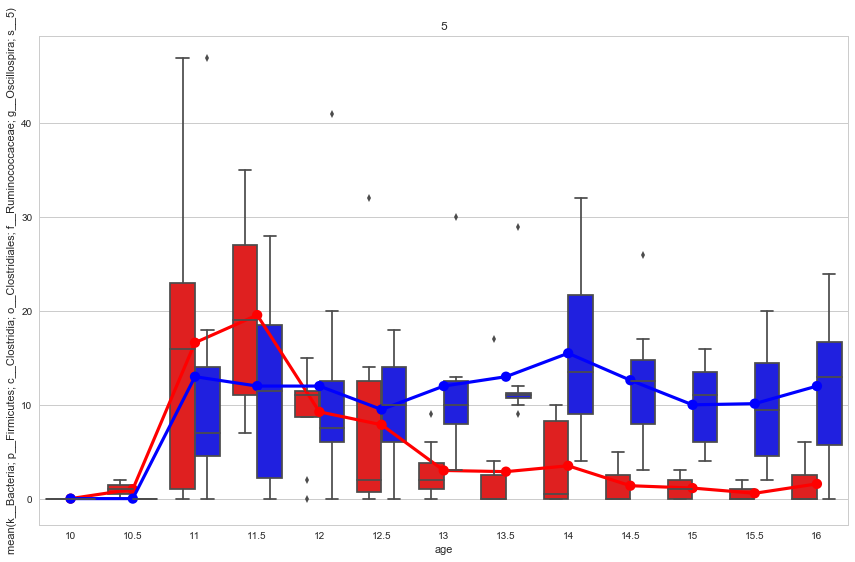

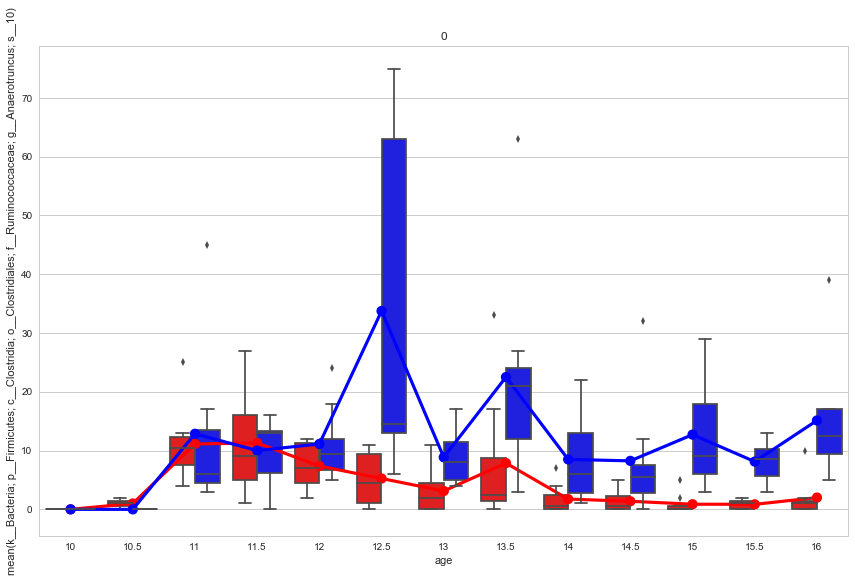

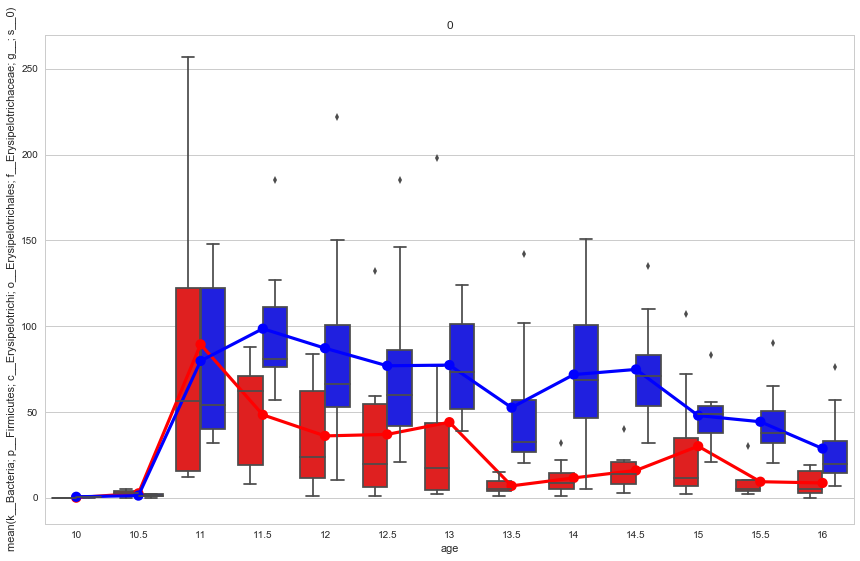

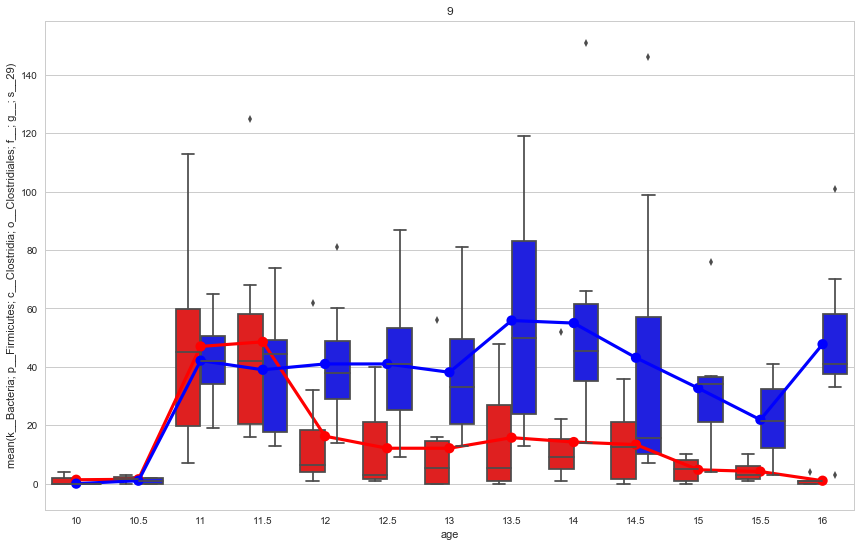

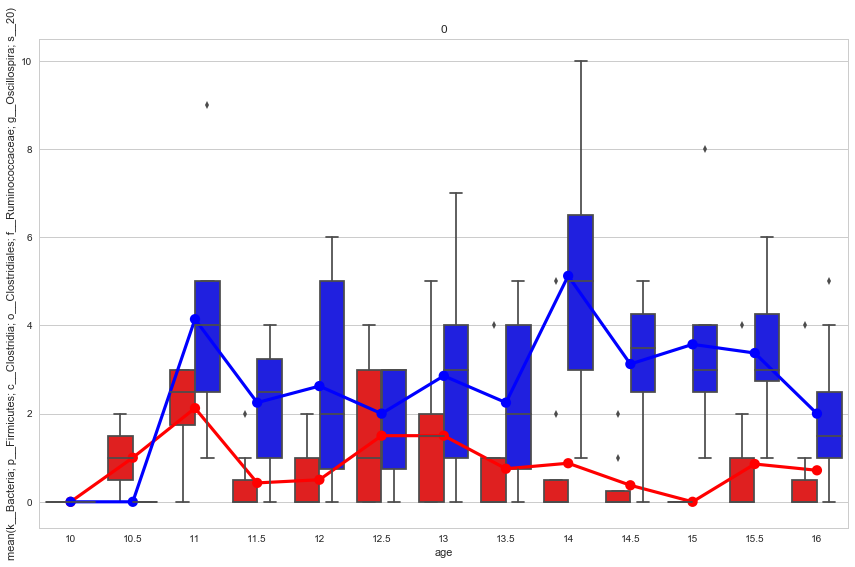

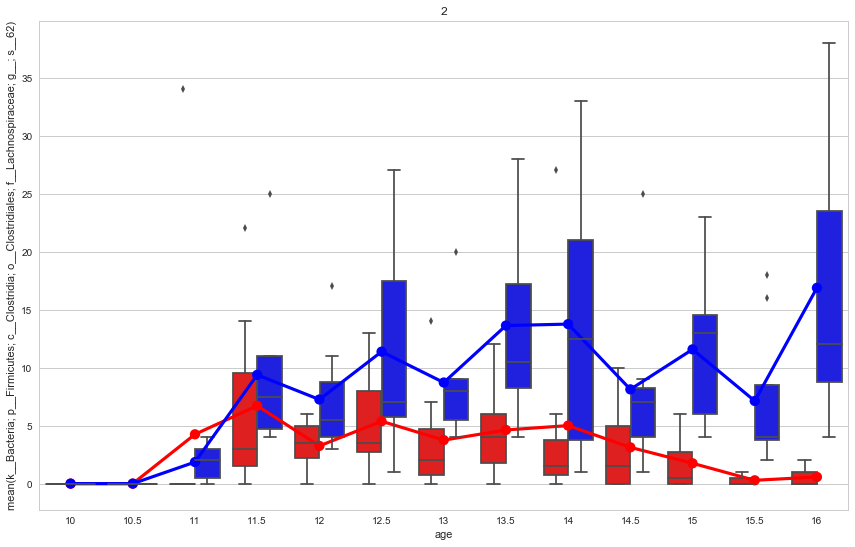

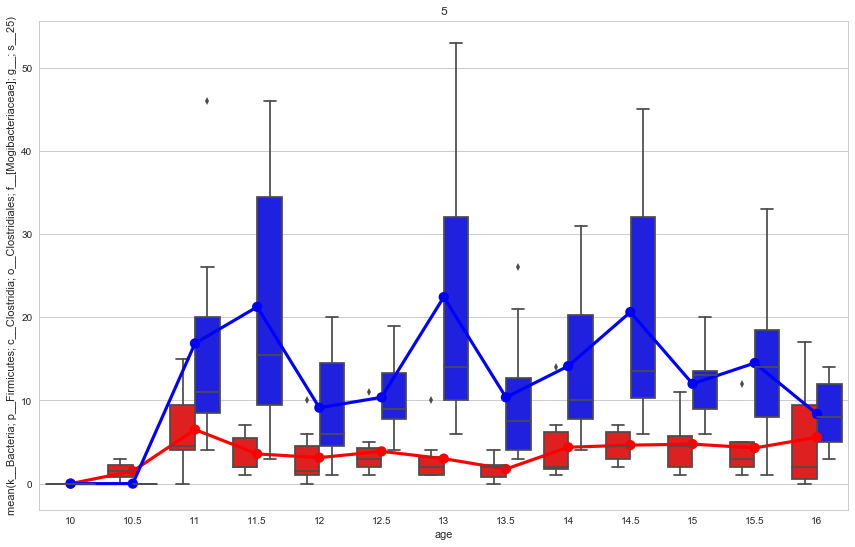

In [44]:
for otu in datap.columns[:-2]:
    fig, ax = plt.subplots()
    fig.set_size_inches(9*1.61, 9)
    count=1
    colr={'IHH': '#0000ff', 'Air': '#ff0000'}
    dd=datap[[otu, 'age', 'exposure_type']]
    g = sns.boxplot(x='age', y=otu, hue='exposure_type', data=dd, palette=colr)
    g=sns.pointplot(x='age', y=otu, hue='exposure_type', data=dd, 
                     kind='point', size=5, palette=colr, ci = None)
    sns.plt.title(otu[-1])
    ax.legend_.remove()
    g.get_figure().savefig("./figures/microbes/%s.pdf" %otu, bbox_to_inches='tight')